<hr>

Capstone Project 3: Machine Learning == E-Commerce Customer Churn <br>

Andhika Prakoso - JCDSOL - A


<hr>

# **A. BACKGROUND STORY/CONTEXT**

Commerce X ingin mencari tahu siapa pelanggan yang akan churn, sehingga dapat melakukan antisipasi sebelum itu terjadi secara efektif dan efisien baik melalui pemberian promo ataupun cara lainnya. Sebagai seorang data scientist, kamu diminta untuk membuat permodelan yang memprediksi siapa pelanggan-pelanggan yang berpotensi churn tersebut beserta karakteristik/pertanda indikasinya.

<hr>

# **B. PROBLEM DEFINITION AND GOALS TO CAPTURE**

**Main problem statment:**<br>
- Dalam usaha terus kompetitif, E-Commerce X perlu terus menjaga agar pelanggannya tetap berbelanja di platformnya. Oleh karena itu, mereka akan melakukan usaha demi mencapai usaha ini, termasuk apabila perlu mengeluarkan biaya. Namun, agar usaha yang dilakukan dapat efektif memberikan promo ke pelanggan yang tepat, E-Commerce X perlu tau secara akurat pelanggan mana yang terindikasi akan menjadi Churn. Pemberian usaha/promo ke pelanggan yang tidak akurat dapat berdampak terhadap tetap terjadinya masalah Churn dan juga penggunaan biaya yant tidak efisien.

**Main Objective:** <br>
- Dalam usaha mengurangi tingkat churn, E-Commerce X ingin memiliki kemampuan untuk dapat menentukan dan memprediksi mana pelanggan yang akan Churn dari platform-nya sebelum hal tersebut terjadi. Sehingga dapat memfokuskan usaha-nya kepada kelompok yang rentan tersebut.
- Selain itu, E-Commerce X juga ingin mengetahui faktor/indikasi yang menjadi pertanda bagi pelanggan yang rentan akan menjadi Churn

**What needs to do:** <br>
Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan pelanggan yang akan Churn dan tidak.
Kemudian kita akan membangun model klasifikasi yang akan membantu E-Commerce X untuk dapat memprediksi probabilitas seorang pelanggan akan Churn atau tidak.

**Metric Evaluation**

![Confussion Matrix](https://miro.medium.com/v2/resize:fit:1218/1*jMs1RmSwnYgR9CsBw-z1dw.png)

- Type 1 error : False Positive --> Konsekuensi: sia-sianya promo yang diberikan, usaha dan biaya terbuang sia-sia 

- Type 2 error : False Negative  --> Konsekuensi: kehilangan pelanggan

Berdasarkan konsekuensinya, maka permodelan yang perlu dibangun adalah model yang dapat mengklasifikasikan pelanggan churn secara tepat sekaligus menjaga cost/biaya yang dikeluarkan. Maka metrik `F1 Score` sangat cocok untuk kasus ini. 
- *F1 Score memberikan bobot yang setara untuk recall dan precision. Hal ini memberikan keuntungan bagi model yang dihasilkan karena akan dapat secara seimbang mendeteksi pelanggan yang berpotensi churn namun tetap memperhatikan kasus false alarm (false positive).*

<hr>

# **C. DATA UNDERSTANDING AND INITIAL CHECKING**


## **C.1. Data source**

Dalam melakukan analisa dan pembuatan model, data yang digunakan adalah data pelangan E-Commerce. Data dapat diakses di [sini](https://drive.google.com/drive/folders/1PITb78NtK9Ra6wOkQdXCIgItZkj29Ves). <br> <br>
Pada data pelanggan E-Commerce yang digunakan terdapat beberapa datapoint seputar aktivitas pelanggan dalam platform E-Commerce X. Secara lengkap, berikut adalah deskripsi seluruh kolom data yang terdapat dalam database: <br> <br>

| Column Name             | Description                                            |
|-------------------------|--------------------------------------------------------|
| Tenure                  | Tenure of a customer in the company.                    |
| WarehouseToHome         | Distance between the warehouse to the customer’s home. |
| NumberOfDeviceRegistered| Total number of devices registered for a customer.      |
| PreferedOrderCat        | Preferred order category of a customer in the last month.|
| SatisfactionScore       | Satisfactory score of a customer on service.            |
| MaritalStatus           | Marital status of a customer.                           |
| NumberOfAddress         | Total number of addresses added for a particular customer.|
| Complaint               | Whether any complaint has been raised in the last month.|
| DaySinceLastOrder       | Days since the last order by the customer.              |
| CashbackAmount          | Average cashback in the last month.                     |
| Churn                   | Churn flag.                                            |



## **C.2. Dataset and library import**

Import library yang akan digunakan dalam proses analisa data dan pembuatan model.

In [1]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from scipy.stats import shapiro, ttest_ind, chi2_contingency, chi2
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.feature_selection import SelectKBest, SelectFromModel, RFE, RFECV
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, StandardScaler, KBinsDiscretizer

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, fbeta_score, make_scorer, roc_auc_score, f1_score, accuracy_score, recall_score, precision_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

# Imbalance Dataset
import imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, KMeansSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN,SMOTETomek

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import logging
logging.getLogger('lightgbm').setLevel(logging.WARNING)

# Saving Model
import pickle

#SHAP
import shap

Import dataset yang akan dianalisa ke dalam variable ``Raw_Data``.

In [2]:
Raw_data = pd.read_csv('data_ecommerce_customer_churn.csv', delimiter = ',')

Copy dataset ke dalam variable baru ``df``, agar kondisi ``Raw_Data`` tidak terdampak atas aktivitas analisa data

In [3]:
df = Raw_data.copy()
display(df.head(10), df.tail(10))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
5,7.0,16.0,4,Mobile Phone,2,Divorced,2,0,11.0,152.81,0
6,1.0,15.0,6,Mobile Phone,5,Divorced,3,0,2.0,149.51,0
7,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
8,11.0,12.0,4,Mobile Phone,3,Married,2,0,4.0,137.02,0
9,17.0,7.0,3,Laptop & Accessory,1,Married,5,1,2.0,157.43,0


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3931,14.0,18.0,3,Mobile Phone,2,Divorced,4,1,0.0,147.66,0
3932,20.0,15.0,5,Laptop & Accessory,5,Married,10,1,8.0,171.15,0
3933,25.0,15.0,5,Fashion,4,Married,7,0,8.0,249.90,0
3934,10.0,25.0,3,Laptop & Accessory,3,Married,4,0,2.0,157.68,0
3935,26.0,7.0,4,Grocery,1,Married,4,0,9.0,295.99,0
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1
3940,2.0,7.0,3,Laptop & Accessory,5,Married,1,0,2.0,153.73,0


## **C.3. Data check and understanding** <br> 

Informasi umum/deskriptif dataset e-Commerce Customer Churn

In [4]:
print(f'Jumlah baris dan kolom dari dataset Customer Churn adalah {df.shape}') 
df.info()

Jumlah baris dan kolom dari dataset Customer Churn adalah (3941, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [5]:
display(df.describe().T, df.describe(include='object').T)

,count,mean,std,min,25%,50%,75%,max
Tenure,3747.0,10.081398,8.498864,0.0,2.0,9.00,16.00,61.00
WarehouseToHome,3772.0,15.650583,8.452301,5.0,9.0,14.00,21.00,127.00
NumberOfDeviceRegistered,3941.0,3.679269,1.013938,1.0,3.0,4.00,4.00,6.00
SatisfactionScore,3941.0,3.088302,1.381832,1.0,2.0,3.00,4.00,5.00
NumberOfAddress,3941.0,4.237757,2.626699,1.0,2.0,3.00,6.00,22.00
Complain,3941.0,0.282416,0.450232,0.0,0.0,0.00,1.00,1.00
DaySinceLastOrder,3728.0,4.531652,3.667648,0.0,2.0,3.00,7.00,46.00
CashbackAmount,3941.0,176.707419,48.791784,0.0,145.7,163.34,195.25,324.99
Churn,3941.0,0.171023,0.376576,0.0,0.0,0.00,0.00,1.00


,count,unique,top,freq
PreferedOrderCat,3941,6,Laptop & Accessory,1458
MaritalStatus,3941,3,Married,2055


In [6]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values), df[col].max(), df[col].min()]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'CountNull', '%null', 'CountUnique', 'UniqueValue', 'MaxValue', 'MinValue'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,CountNull,%null,CountUnique,UniqueValue,MaxValue,MinValue
0,Tenure,float64,194,4.92,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,...",61.0,0.0
1,WarehouseToHome,float64,169,4.29,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0...",127.0,5.0
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[4, 3, 6, 2, 5, 1]",6,1
3,PreferedOrderCat,object,0,0.00,6,"[Laptop & Accessory, Mobile, Fashion, Others, ...",Others,Fashion
4,SatisfactionScore,int64,0,0.00,5,"[3, 1, 4, 2, 5]",5,1
5,MaritalStatus,object,0,0.00,3,"[Single, Married, Divorced]",Single,Divorced
6,NumberOfAddress,int64,0,0.00,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]",22,1
7,Complain,int64,0,0.00,2,"[0, 1]",1,0
8,DaySinceLastOrder,float64,213,5.40,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,...",46.0,0.0
9,CashbackAmount,float64,0,0.00,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8...",324.99,0.0


Proporsi kelompok pelanggan Churn VS Non-Churn

In [8]:
df.value_counts('Churn')

Churn
0    3267
1     674
Name: count, dtype: int64

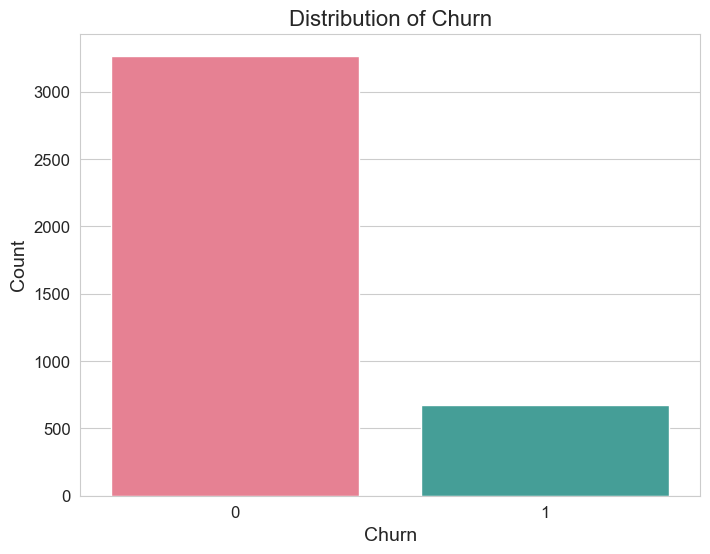

In [7]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette='husl')
plt.title('Distribution of Churn', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Uji normalitas distribusi dataset

In [184]:
# Performing Shapiro-Wilk test for normality on each numerical column
normality_test_results = {}

for column in df.select_dtypes(include=['float64', 'int64']):
    stat, p = shapiro(df[column].dropna())  # dropna to remove missing values
    normality_test_results[column] = {'Statistic': stat, 'p-value': p}

# Creating a DataFrame to display the test results
normality_test_df = pd.DataFrame(normality_test_results).T

# Displaying the DataFrame
print(normality_test_df)

                          Statistic       p-value
Tenure                     0.919118  6.657973e-41
WarehouseToHome            0.869019  1.156161e-48
NumberOfDeviceRegistered   0.894166  5.962349e-46
SatisfactionScore          0.884763  2.470841e-47
NumberOfAddress            0.874486  9.639375e-49
Complain                   0.563795  1.018374e-71
DaySinceLastOrder          0.892175  2.723472e-45
CashbackAmount             0.885263  2.911029e-47
Churn                      0.455131  2.666882e-76


Secara deskriptif, beberapa temuan awal terkait fitur/kolom yang terdapat dalam dataset:
1. Terdapat missing_value pada 3 kolom yaitu `Tenure`, `WarehouseToHome`, dan `DaySinceLastOrder`
1. Seluruh kolom sudah berada dalam datatype yang sesuai dengan tipe datanya
1. Distribusi data pada fitur  `Churn` didominasi oleh kode `0` atau `non-Churn`. Hal ini sangat wajar mengingat secara logika proporsi churn akan lebih sedikit dibanding data pelanggan yang tidak churn. Hal ini juga akan menjadi pertimbangan lebih lanjut dalam penanganan modifikasi data (data engineering)
1. Fitur/kolom dalam data cenderung memiliki persebaran data yang tidak normal.
1. Terdapat kategori yang diduga error pada column `PreferredOrderCat` yaitu kategori `Mobile`. Analisa lebih lanjut akan dilakukan pada bagian penanganan data error.

## **C.4. Handling data duplicate, missing, outliers** <br> 

### **Pengecekan & penanganan data duplicate**

Cek proporsi data duplikat diantara seluruh row dataset. 
- Kriteria data duplikat adalah data yang memiliki value identik (sama) diseluruh kolom yang tersedia

In [185]:
df[df.duplicated(subset=df.columns)]
df.duplicated().value_counts()

False    3270
True      671
Name: count, dtype: int64

Ditemukan sejumlah `671` row data yang teridentifikasi duplikat/memiliki value sama persis di setiap kolom. Berikut adalah list data duplikatnya:

In [186]:
duplicate_data = pd.concat([df,pd.DataFrame(df.duplicated(subset=df.columns))], axis=1)
duplicate_data[duplicate_data[0] == True]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,0
70,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1,True
128,1.0,10.0,4,Mobile Phone,1,Single,3,1,1.0,140.69,1,True
194,18.0,26.0,3,Laptop & Accessory,3,Single,9,0,1.0,148.50,0,True
253,19.0,6.0,3,Fashion,5,Married,2,0,7.0,204.53,0,True
289,16.0,36.0,4,Laptop & Accessory,3,Married,4,0,3.0,170.56,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
3930,22.0,17.0,3,Laptop & Accessory,1,Single,4,0,4.0,145.07,0,True
3932,20.0,15.0,5,Laptop & Accessory,5,Married,10,1,8.0,171.15,0,True
3934,10.0,25.0,3,Laptop & Accessory,3,Married,4,0,2.0,157.68,0,True
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0,True


Berikut adalah pembuktian untuk memperlihatkan bahwa data tersebut merupakan duplikat menggunakan kolom `CashbackAmount` sebagai parameter penguji.
- Kita ambil satu nilai random dari list diatas, yaitu 140.69.
- Hasil pengecekan membuktikan bahwa memang terdapat 2 row data yang memiliki value identik di setiap kolom.

In [187]:
duplicate_data[duplicate_data['CashbackAmount']==140.69]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,0
82,1.0,10.0,4,Mobile Phone,1,Single,3,1,1.0,140.69,1,False
128,1.0,10.0,4,Mobile Phone,1,Single,3,1,1.0,140.69,1,True
3844,13.0,14.0,3,Laptop & Accessory,1,Married,4,1,2.0,140.69,0,False


Dengan pertimbangan bahwa ada potensi dimana model akan mengira bahwa data tersebut datang dari dua pelanggan berbeda sehingga berpengaruh terhadap kualitas dan akurasi output model yang akan dibangun, maka tindakan yang dilakukan terhadap data ini adalah dengan melakukan `drop/remove`.

In [188]:
df.drop_duplicates(subset=df.columns, keep='first', inplace= True)
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3933,25.0,15.0,5,Fashion,4,Married,7,0,8.0,249.90,0
3935,26.0,7.0,4,Grocery,1,Married,4,0,9.0,295.99,0
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0


Pembuktian kembali bahwa dataset duplikat sudah diremove

In [189]:
df[df.duplicated(subset=df.columns)]
df.duplicated().value_counts()

False    3270
Name: count, dtype: int64

### **Pengecekan & penanganan data missing**

Setelah penghapusan data duplikat, selanjutnya kita akan menangani data missing dalam dataset. Pertama, kita cek columns yang memiliki `missing value`

In [190]:
pd.DataFrame(df.isna().sum())

,0
Tenure,160
WarehouseToHome,135
NumberOfDeviceRegistered,0
PreferedOrderCat,0
SatisfactionScore,0
MaritalStatus,0
NumberOfAddress,0
Complain,0
DaySinceLastOrder,181
CashbackAmount,0


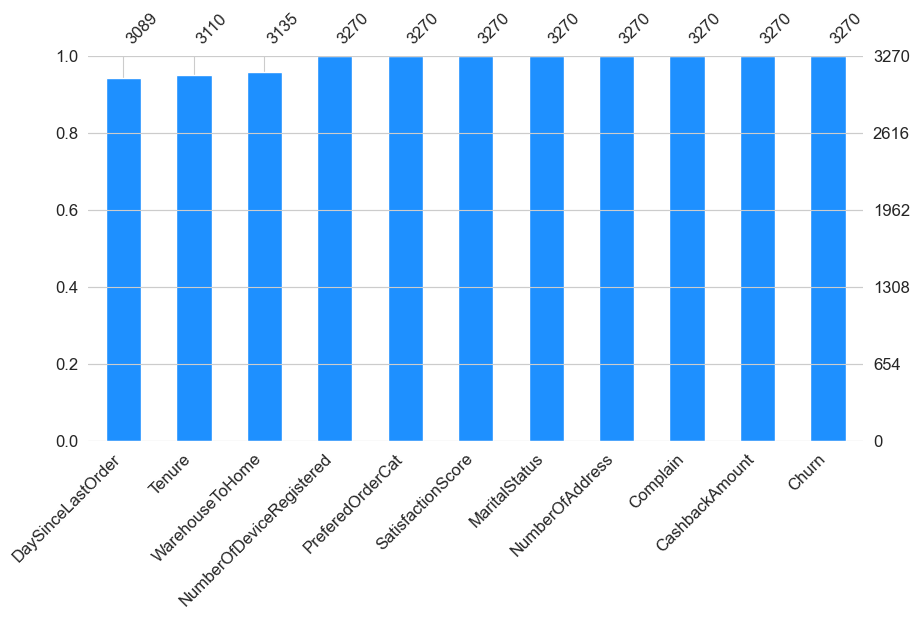

In [191]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

Terlihat dari Bar Plot, kolom `DaysSinceLastOrder`, `Tenure`, dan `WarehouseToHome` memiliki missing values/data yang hilang

Setelah mengetahui columns yang memiliki missing value, kita periksa apakah missing value memiliki keterkaitan/hubungan pada antar columns

<Axes: >

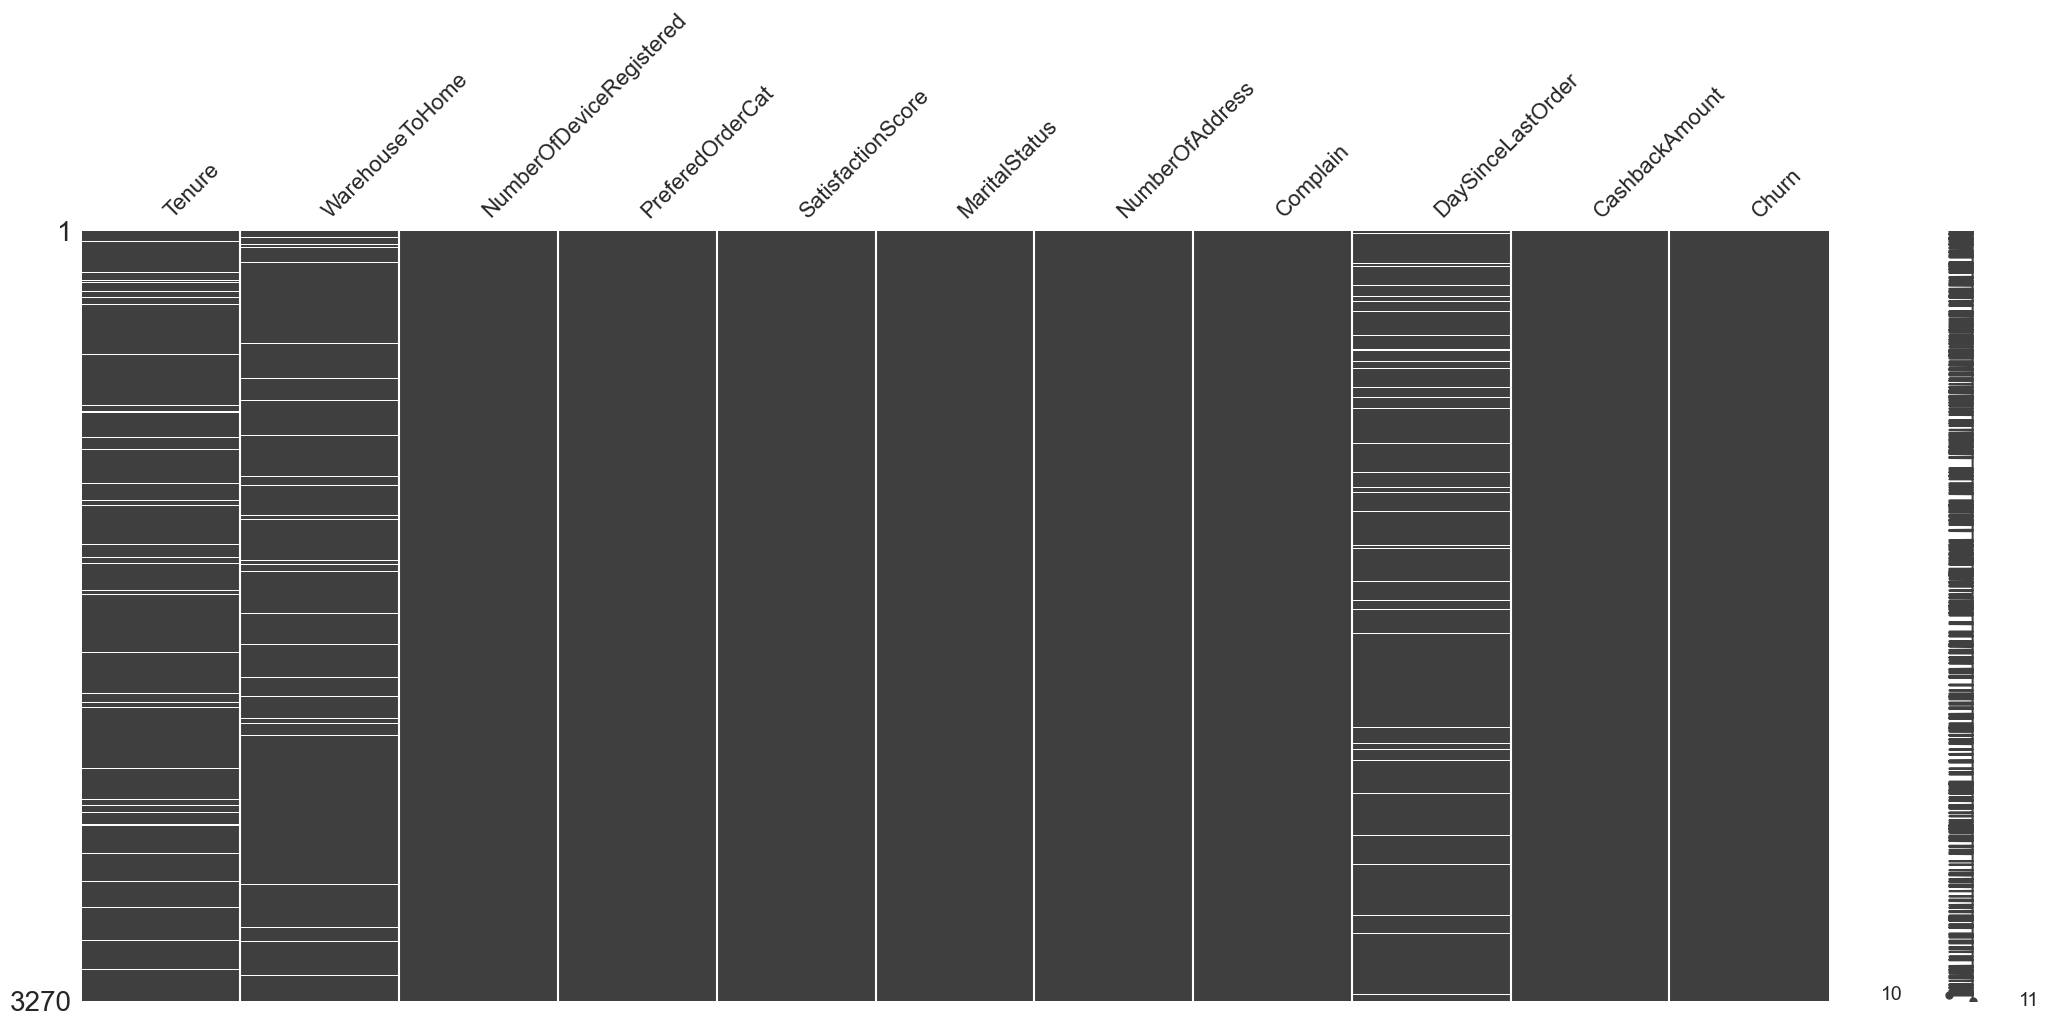

In [192]:
missingno.matrix(df)

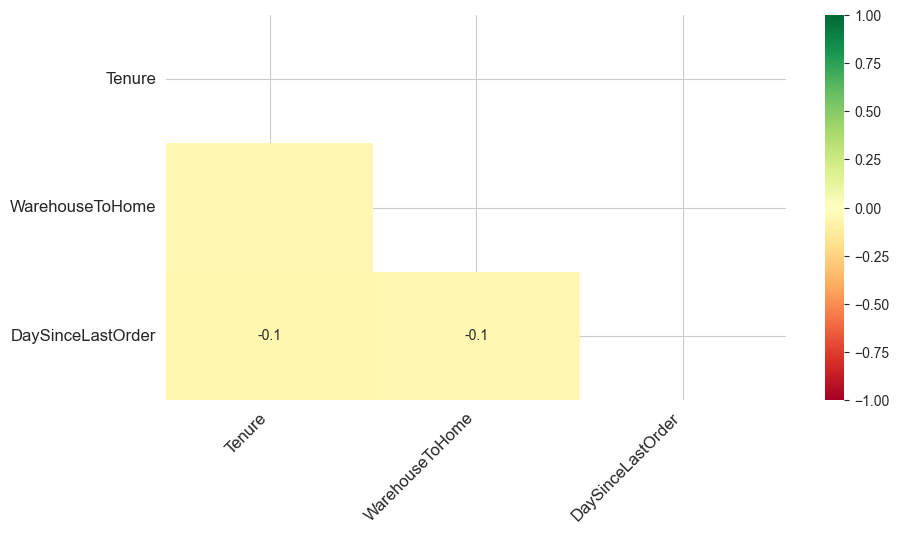

In [193]:
missingno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12);

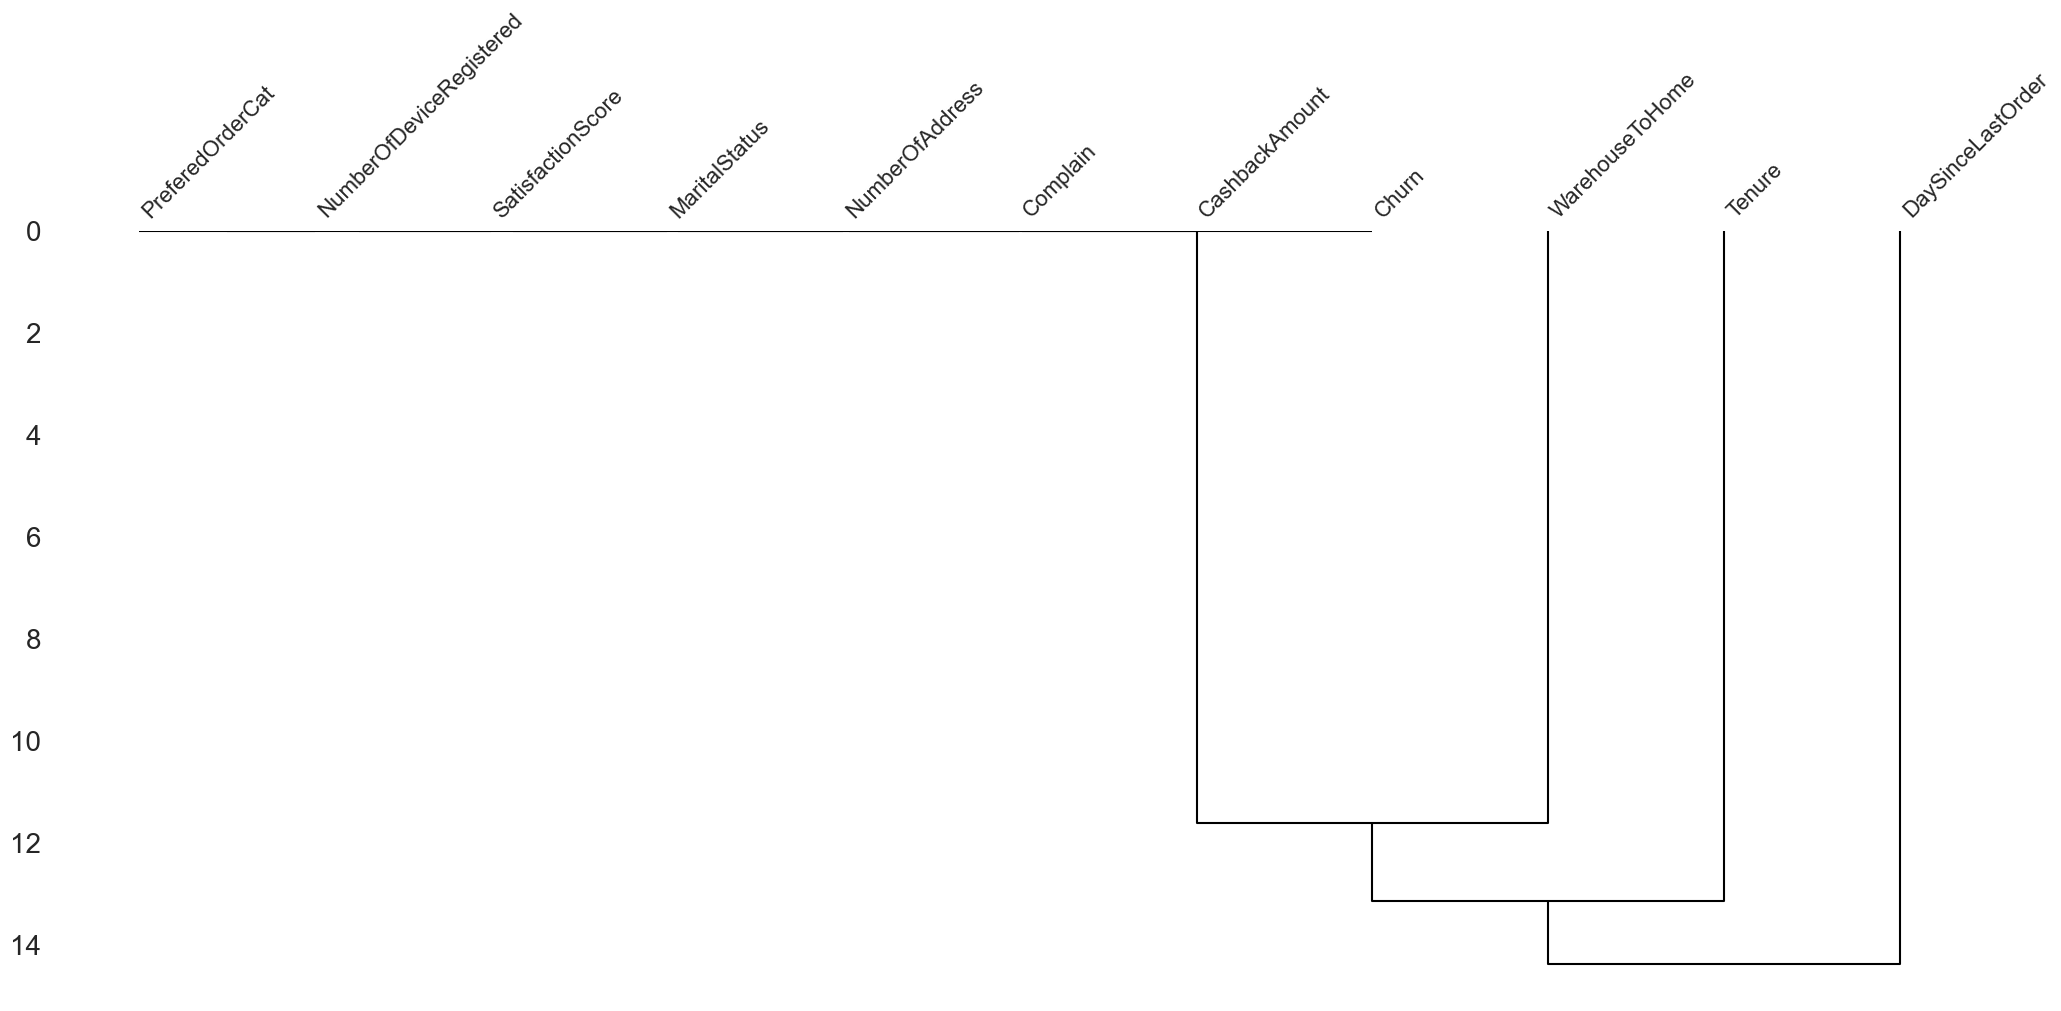

In [194]:
missingno.dendrogram(df)
plt.show()

Pengecekan melalui missingno heatmap, matrix, dan dendogram menunjukkan bahwa missing value di tiap columns tidak saling terkait satu sama lain. Oleh karena itu, penanganan missing value akan dilakukan secara terpisah untuk setiap columns. 

**Proses penanganan missing value pada kolom akan mengacu kepada karakteristik pelanggan tergantung statusnya di kolom `churn`**. Hal ini didasari alasan bahwa proses ini bertujuan membangun model churn prediction, oleh karena itu missing value yang diisi akan lebih akurat apabila value baru yang diberikan menyerupai dengan karakteristik status churn-nya.

Mari kita cek proporsi missing value setiap kolom terhadap total berdasarkan churn status:

In [195]:
columns_with_missing_values = df[['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'Churn']].isnull()
columns_with_missing_values['Churn'] = df['Churn'] 

pivot_table = columns_with_missing_values.groupby('Churn').sum(); total_counts_per_churn = df['Churn'].value_counts()
pivot_table = (pivot_table.divide(total_counts_per_churn, axis=0)* 100).round(2)
pivot_table = pivot_table.applymap(lambda x: f'{x}%')
pivot_table

,Tenure,WarehouseToHome,DaySinceLastOrder
Churn,,,
0,4.09%,3.29%,5.52%
1,8.99%,8.43%,5.62%


Melihat bahwa terdapat sekitar 4 - 9% value missing khususnya pada data kelompok pelanggan Churn, meremove/delete data dengan missing value merupakan pilihan yang kurang bijak dan dapat beresiko menurunkan akurasi hasil karena keterbatasan jumlah data. Oleh karena itu, tindakan yang akan diambil adalah dengan melakukan impute data terhadap setiap data missing value.

Cara impute yang akan diambil akan berdasarkan kondisi data distribusinya. Mari kita cek terlebih dahulu

In [196]:
columns_with_missing_values_before_impute  = df[['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'Churn']].copy()
columns_with_missing_values_before_impute.groupby('Churn').describe().round(2).T

Churn                          0       1
Tenure            count  2624.00  486.00
                  mean     11.49    3.18
                  std       8.53    5.25
                  min       0.00    0.00
                  25%       5.00    0.00
                  50%      10.00    1.00
                  75%      17.00    3.00
                  max      61.00   21.00
WarehouseToHome   count  2646.00  489.00
                  mean     15.24   16.99
                  std       8.50    8.78
                  min       5.00    5.00
                  25%       9.00    9.00
                  50%      13.00   15.00
                  75%      19.00   24.00
                  max     127.00   36.00
DaySinceLastOrder count  2585.00  504.00
                  mean      4.79    3.31
                  std       3.67    3.58
                  min       0.00    0.00
                  25%       2.00    1.00
                  50%       4.00    2.00
                  75%       8.00    5.00
                  max      31.00   46.00

Melihat distribusi persebaran data ketiga kolom dengan missing value terlihat bahwa data terdistribusi secara skewed dan terjadi cukup banyak (5% - 9%). Maka, impute sederhana seperti mean atau median tidak dapat memberikan akurasi yang baik. Metode impute membutuhkan cara yang lebih advance. Oleh karena itu impute misssing value akan dilakukan dengan model machnine learning, yaitu KNN.

*Note: Jumlah N-neighbors yang digunakan adalah hasil akhir setelah dilakukan beberapa kali pengujian jumlah sampai diyakini memberikan hasil paling baik.*

In [197]:
df_imputed = pd.DataFrame()


for churn_value, group in df.groupby('Churn'):
    columns_for_imputation = group.columns[group.isnull().any()].tolist()
    
    data_for_imputation = group[columns_for_imputation]

    knn_imputer = KNNImputer(n_neighbors=6)
    data_imputed = knn_imputer.fit_transform(data_for_imputation)

    imputed_group = pd.DataFrame(data_imputed, columns=columns_for_imputation, index=group.index)
    imputed_group['Churn'] = churn_value

    df_imputed = pd.concat([df_imputed, imputed_group])

df_imputed = df_imputed.reindex(df.index)

df[columns_for_imputation] = df_imputed[columns_for_imputation]

print(df.isnull().sum())


Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64


In [198]:
columns_with_missing_values_after_impute  = df[['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'Churn']].copy()
columns_with_missing_values_after_impute.groupby('Churn').describe().round(2).T

Churn                          0       1
Tenure            count  2736.00  534.00
                  mean     11.40    3.14
                  std       8.38    5.04
                  min       0.00    0.00
                  25%       5.00    0.00
                  50%      10.00    1.00
                  75%      17.00    3.33
                  max      61.00   21.00
WarehouseToHome   count  2736.00  534.00
                  mean     15.23   16.80
                  std       8.38    8.50
                  min       5.00    5.00
                  25%       9.00    9.00
                  50%      13.00   15.00
                  75%      19.00   23.00
                  max     127.00   36.00
DaySinceLastOrder count  2736.00  534.00
                  mean      4.71    3.28
                  std       3.60    3.50
                  min       0.00    0.00
                  25%       2.00    1.00
                  50%       3.50    2.00
                  75%       8.00    5.00
                  max      31.00   46.00

Setelah melakukan impute dengan median, mari kita uji apakah proses impute ini merubah distribusi data yang dimiliki oleh kolom yang baru saja kita impute. Harapannya penambahan value tidak merubah distribusi data secara signifikan. Proses yang akan dilakukan adalah:
1. Pengujian statistik mean difference antara sebelum dan sesudah impute (menggunakan mann-whitney test -> data tidak terdistribusi normal)
1. Perbandingan grafik histogram antara sebelum dan sesudah impute

In [199]:
from scipy.stats import mannwhitneyu

mannwhitneyu_results = []

for column in ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']:
    before = columns_with_missing_values_before_impute[column].dropna()
    after = columns_with_missing_values_after_impute[column].dropna()

    stat, p = mannwhitneyu(before, after)
    
    mannwhitneyu_results.append({'Column': column, 'Statistic': stat, 'p-value': p})

mannwhitneyu_results_df = pd.DataFrame(mannwhitneyu_results)

print(mannwhitneyu_results_df)


              Column  Statistic   p-value
0             Tenure  5112101.0  0.710474
1    WarehouseToHome  5094710.0  0.674553
2  DaySinceLastOrder  5078036.5  0.705121


Uji statistik menunjukkan seluruh kolom memiliki p-value > 0.05, yang berarti uji statistik menyatakan bahwa gagal menolak H0. **Artinya hasil impute dengan median tidak mengubah data secara signifikan.**

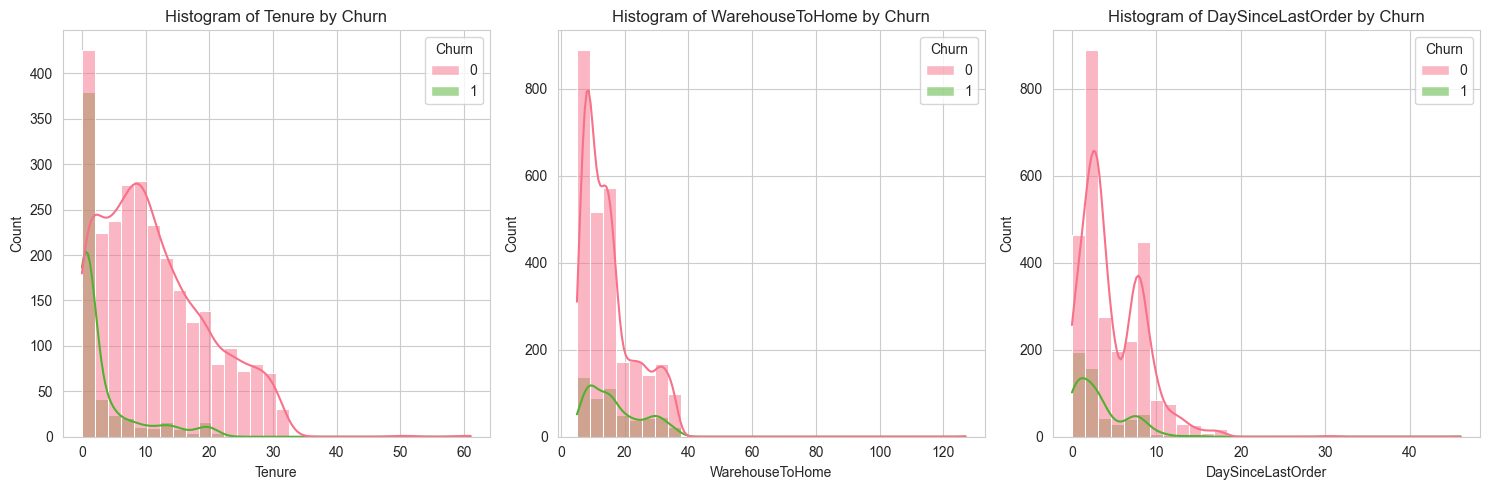

In [200]:
columns_with_missing_values = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']

custom_palette = sns.color_palette("husl", len(columns_with_missing_values))

plt.figure(figsize=(15, 5))

for i, column in enumerate(columns_with_missing_values, 1):
    plt.subplot(1, len(columns_with_missing_values), i)
    sns.histplot(data=df, x=column, hue='Churn', kde=True, bins=30, multiple="layer", palette=custom_palette)
    plt.title(f'Histogram of {column} by Churn')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Melalui pembuktian ini, dapat disimpulkan bahwa proses pengisian missing value dengan median mampu mengisi value kosong dengan tidak mengubah distribusi/kondisi persebaran data. Oleh karena itu proses penanganan missing value telah selesai dilakukan.

### **Pengecekan & penanganan data outliers**

Untuk pengecekan outliers, kita akan menggunakan visualisasi boxplot graph. Namun kita hanya akan mencari outliers pada sejumlah columns numerik kecuali `Churn`, `SatisfactionScore` dan `Complaint` mengingat karakteristik data-nya yang bersifat likert (pilihan skor terbatas)

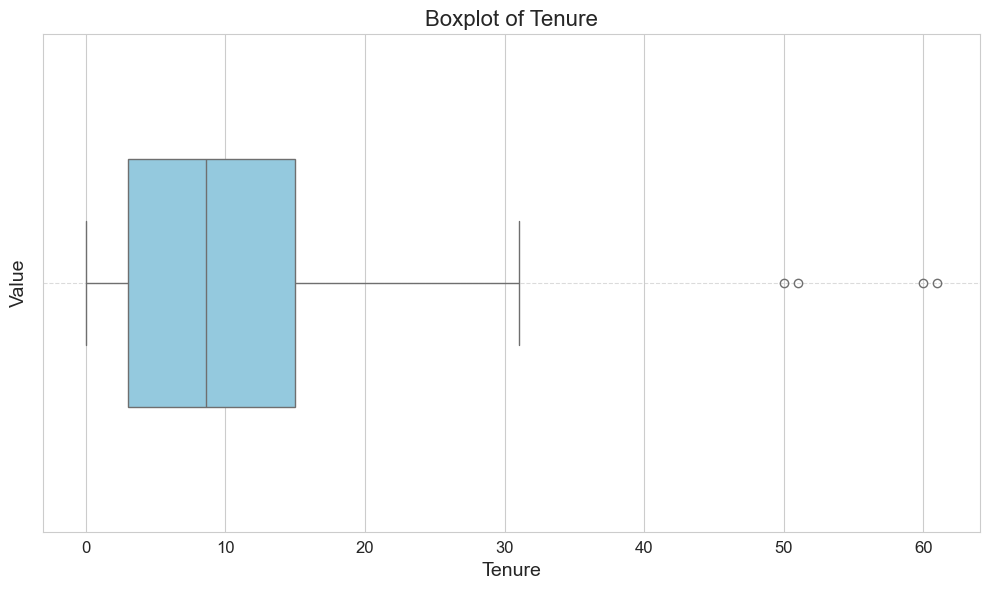

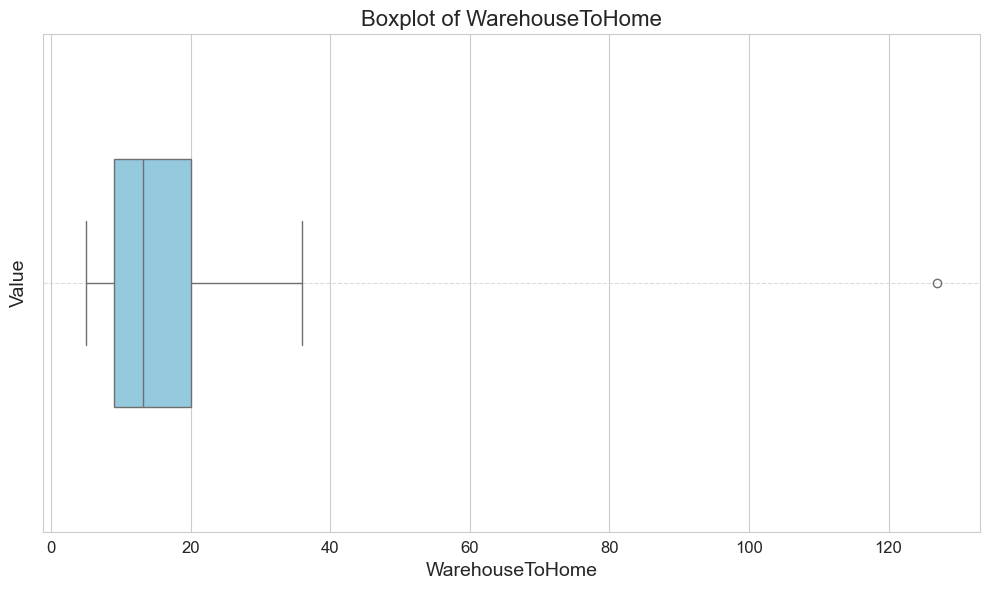

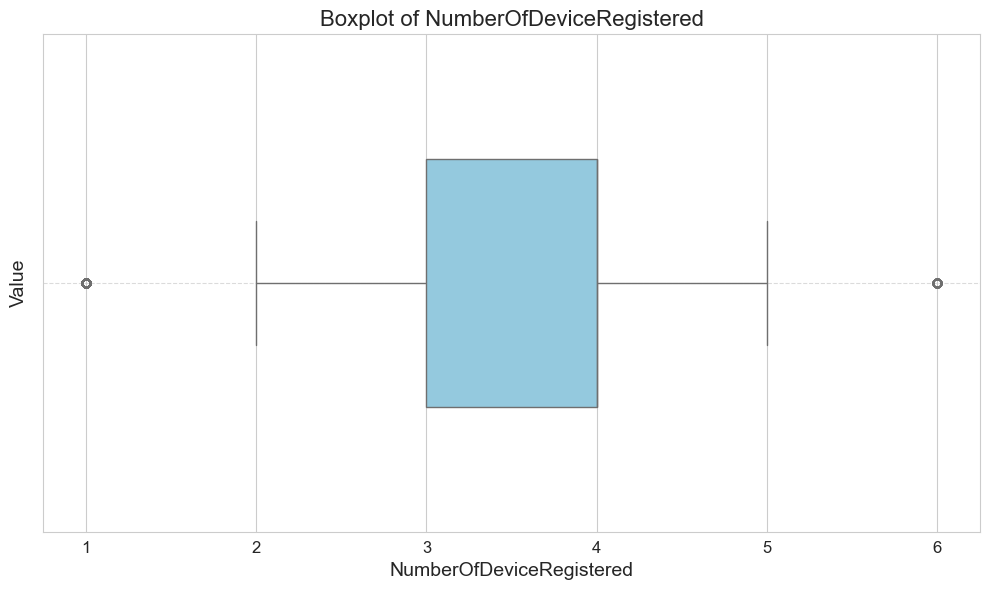

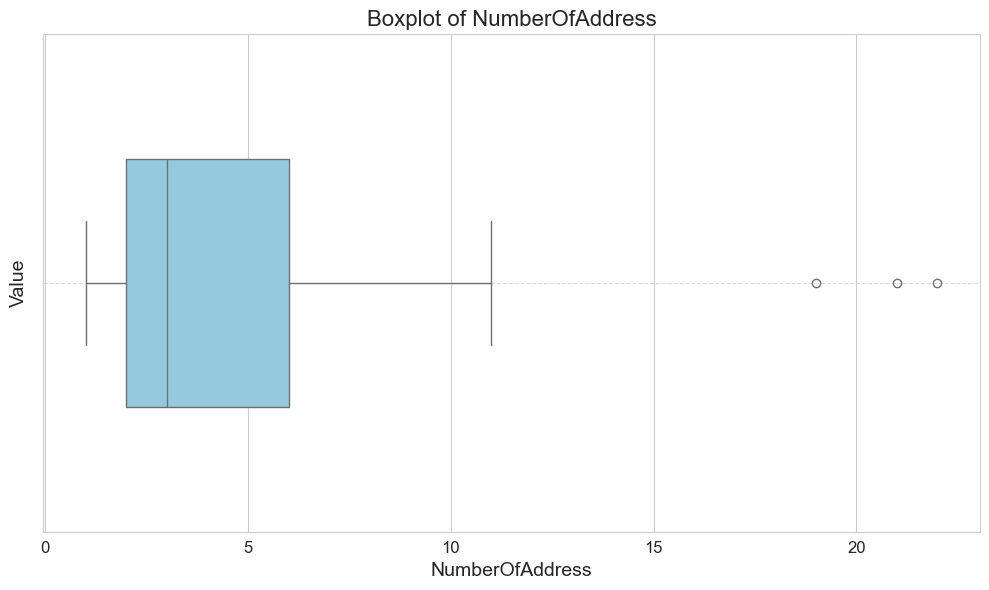

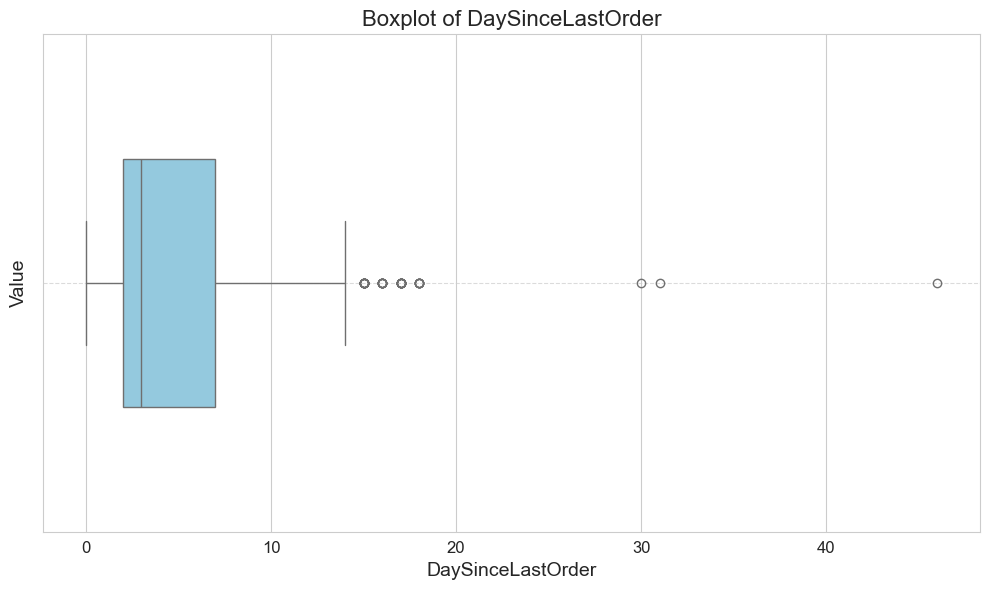

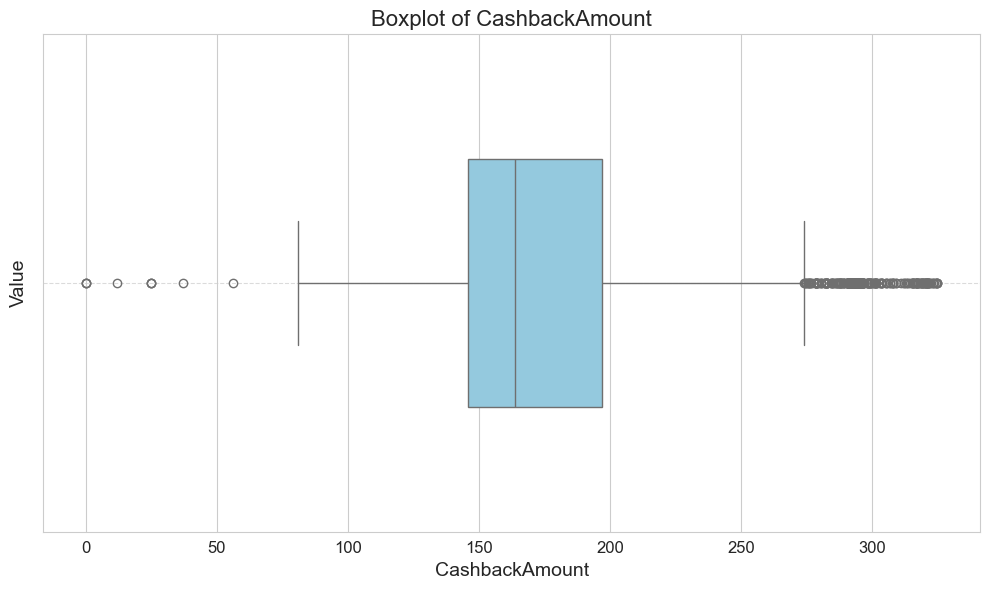

In [201]:
numerical_columns = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
                     'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column], color='skyblue', width=0.5)
    plt.title(f'Boxplot of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Hasil pengecekan menunjukkan bahwa terdapat sejumlah data yang terindikasi outliers pada di sejumlah column. Namun pengecekan lebih lanjut memperlihatkan bahwa data ouliers yang teridentifikasi di sini masih tergolong masuk akal untuk terjadi. Sebagai contoh, data >40 hari pada column `DaysSinceLastOrder`, dimana hal ini masih masuk akal untuk terjadi pada realita. Oleh karena itu, **data-data yang teridentifikasi outliers akan dipertahankan dalam dataset sebagai data yang akan digunakan dalam proses pembuatan model**

### **Pengecekan & penanganan data error**

Untuk menangani kategori yang kurang jelas yaitu `Mobile` pada column `PreferredOrderCat`, kita akan coba analisa kemiripan karakteristik kategori ini terhadap kategori lain, khususnya dengan Mobile Phone. Apabila ada kemiripan, maka kita dapat ubah ke kelompok baru tersebut.
- Parameter yang kita gunakan untuk menentukan kemiripan karakteristik adalah berdasarkan rata-rata `CashbackAmount`. Rasionalisasinya adalah dengan barang yang serupa dapat diperkirakan pelanggan tersebut akan mendapat Cashback yang setara juga.

In [202]:
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1213
Mobile Phone           725
Fashion                484
Mobile                 458
Grocery                241
Others                 149
Name: count, dtype: int64

In [203]:
mean_values = df.groupby('PreferedOrderCat')['CashbackAmount'].mean()

mean_values

PreferedOrderCat
Fashion               210.878492
Grocery               268.444481
Laptop & Accessory    167.188261
Mobile                126.201921
Mobile Phone          148.460345
Others                303.099866
Name: CashbackAmount, dtype: float64

Dari hasil ini menunjukkan bahwa kelompok Mobile memiliki kedekatan paling mirip dengan Mobile phone dari sisi rata-rata nominal Cashback Amount yang didapatkan. Berdasarkan hasil ini, aman untuk mengasumsikan untuk dapat mengelompokan kelompok Mobile menjadi Mobile Phone. Langkah selanjutnya adalah mengubah penamaan kelompok tersebut.

In [204]:
category_mapping = {
    'Mobile': 'Mobile Phone'}

df['PreferedOrderCat'] = df['PreferedOrderCat'].replace(category_mapping)

Pengecekan kembali setelah pengubahan

In [205]:
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1213
Mobile Phone          1183
Fashion                484
Grocery                241
Others                 149
Name: count, dtype: int64

<hr>

# **D. DATA ANALYSIS**


## **D.1. Feature correlation**

Pertama-tama kita coba cek korelasi antar fitur pada data. Hal ini ditujukan untuk mengetahui apakah ada fitur yang saling berkorelasi satu sama lain. Apabila ada, maka kita perlu drop salah satu fitur dengan korelasi tinggi tersebut. Hal ini dikarenakan fitur tersebut dapat mempengaruhi performa model akibat karakteristik data yang mirip/menjadi noise. 
- Kriteria korelasi tinggi atau tidak yaitu apabila nilai korelasi berada di rentang 0.7 - 1

In [206]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns.remove('Churn')

correlation_matrix = df[numerical_columns].corr()

correlation_matrix


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
Tenure,1.000000,-0.027340,-0.035255,-0.034372,0.223693,-0.027477,0.172831,0.463697
WarehouseToHome,-0.027340,1.000000,0.017116,0.007993,-0.009612,0.045406,0.025940,-0.003236
NumberOfDeviceRegistered,-0.035255,0.017116,1.000000,-0.010991,0.076437,0.005338,0.002770,0.120136
SatisfactionScore,-0.034372,0.007993,-0.010991,1.000000,0.042449,-0.035167,0.041065,0.006499
NumberOfAddress,0.223693,-0.009612,0.076437,0.042449,1.000000,-0.011490,-0.065597,0.186623
Complain,-0.027477,0.045406,0.005338,-0.035167,-0.011490,1.000000,-0.047916,-0.002040
DaySinceLastOrder,0.172831,0.025940,0.002770,0.041065,-0.065597,-0.047916,1.000000,0.314124
CashbackAmount,0.463697,-0.003236,0.120136,0.006499,0.186623,-0.002040,0.314124,1.000000


Hasil uji korelasi menunjukkan bahwa tidak ada korelasi yang cukup tinggi antar fitur dalam data. Artinya, kita tidak perlu menghapus fitur apapun dalam data dan seluruh fitur dapat diikutsertakan dalam proses pembuatan model.

## **D.2. Data distribution**

Proses selanjutnya yang dilakukan adalah analisa awal dataset yang dimiliki. Kita akan mulai dengan melihat distribusi persebaran dataset ini melalui grafik histogram.

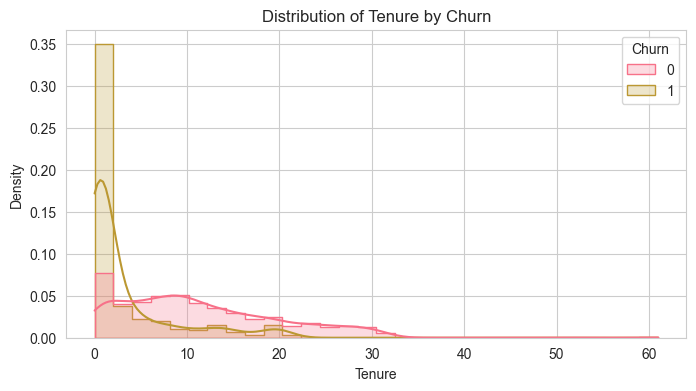

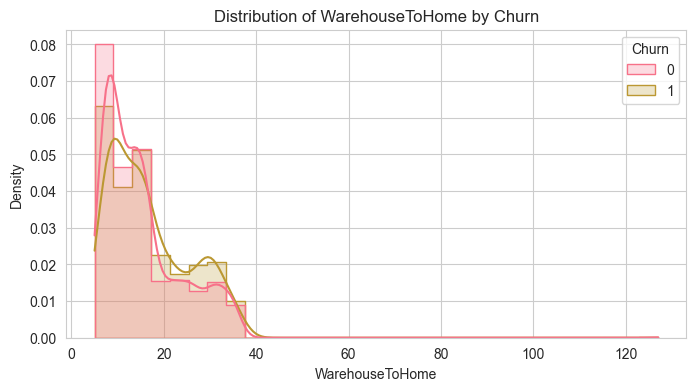

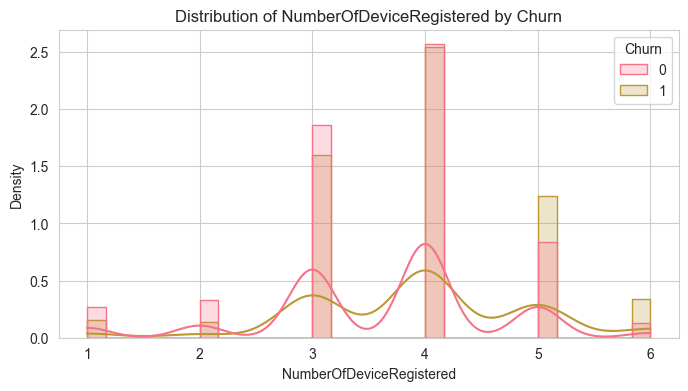

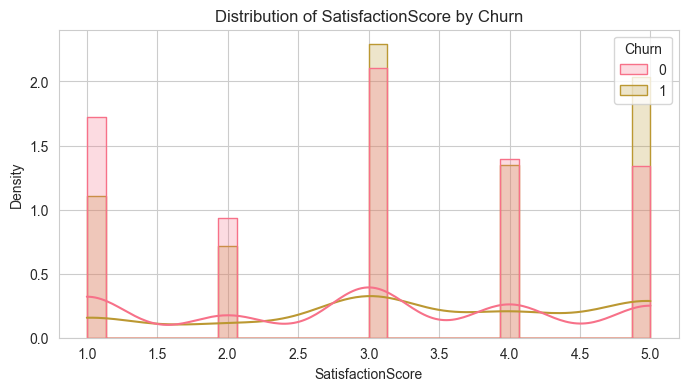

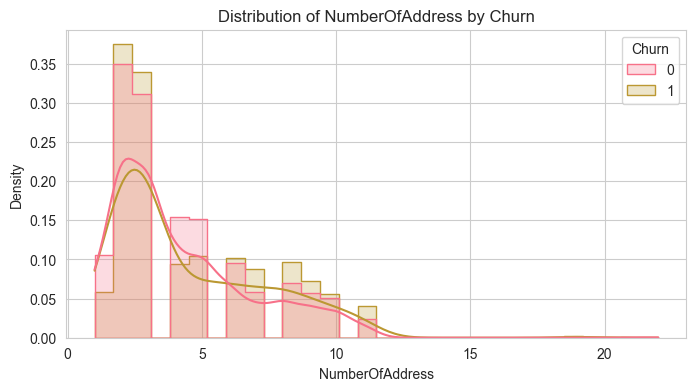

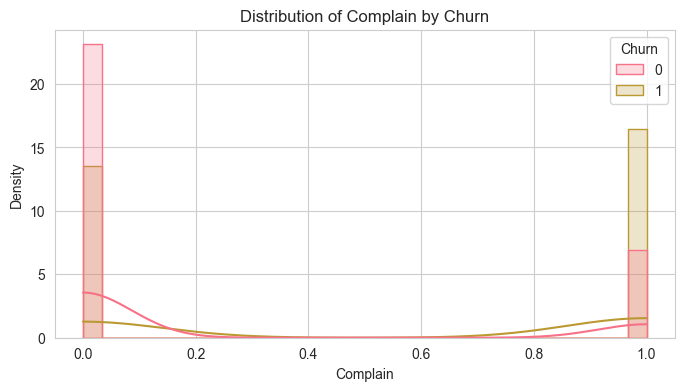

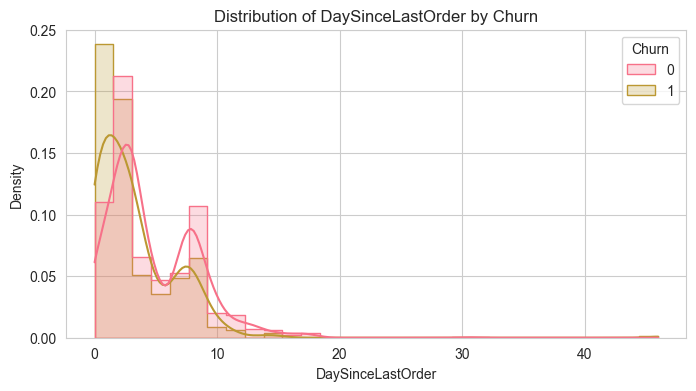

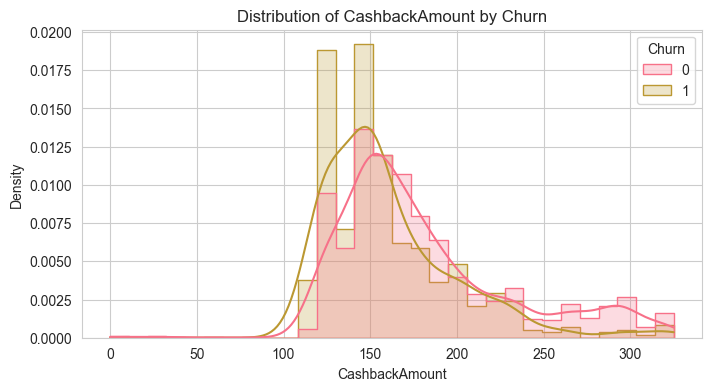

In [207]:
custom_palette = sns.color_palette("husl")

for column in df.select_dtypes(include=['float64', 'int64']):
    if column != 'Churn':
        plt.figure(figsize=(8, 4))
        sns.histplot(df, x=column, hue='Churn', kde=True, bins=30, element='step', multiple="layer", palette=custom_palette, stat="density", common_norm=False)
        plt.title(f'Distribution of {column} by Churn')
        plt.show()

<Figure size 1000x600 with 0 Axes>

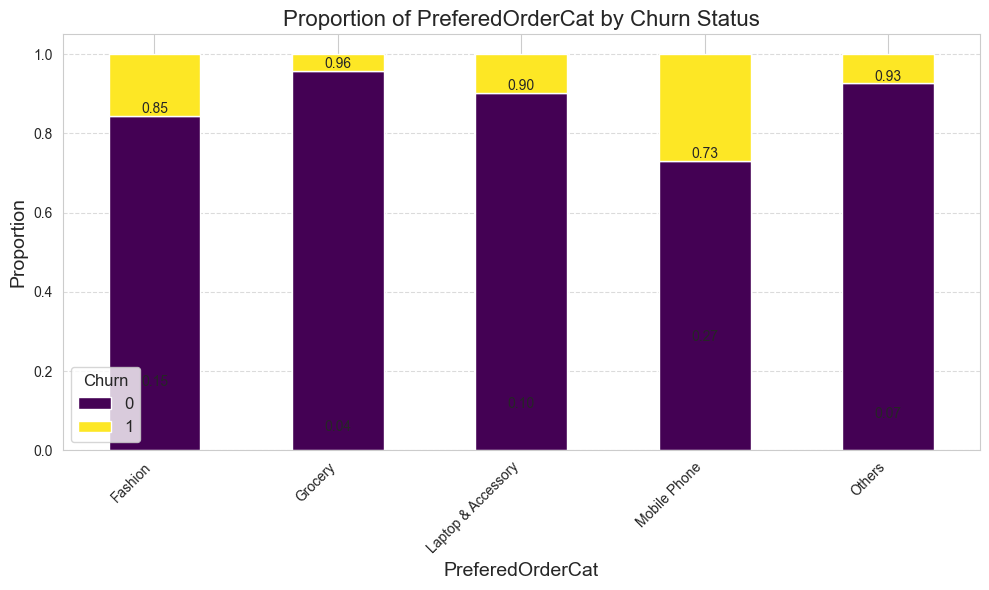

<Figure size 1000x600 with 0 Axes>

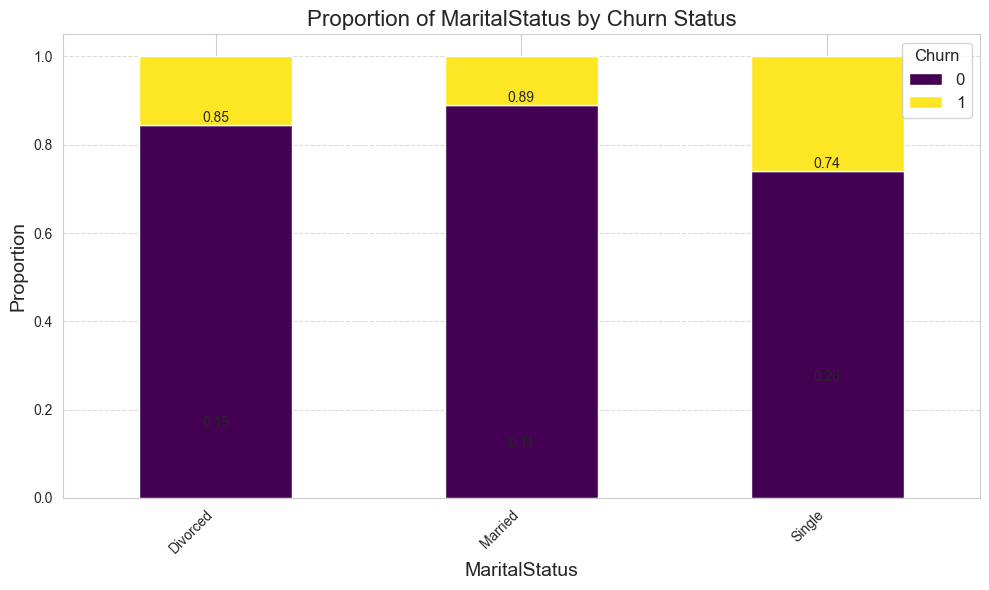

In [208]:
for column in df.select_dtypes(include=['object']):
    plt.figure(figsize=(10, 6))

    total = df.groupby(column)['Churn'].value_counts(normalize=True).unstack().fillna(0)

    ax = total.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='viridis')
    
    plt.title(f'Proportion of {column} by Churn Status', fontsize=16)
    plt.ylabel('Proportion', fontsize=14)
    plt.xlabel(column, fontsize=14)
    
    plt.legend(title='Churn', fontsize=12, title_fontsize=12)
    
    plt.xticks(rotation=45, ha='right')
    
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, xytext=(0, 5), 
                    textcoords='offset points')
    
    plt.tight_layout()
    plt.show()

Dari hasil distribusi persebaran data, diketahui sejumlah temuan awal mengenai perbedaan antara pelanggan Churn dan Non-churn berdasarkan features yang tersedia. 

Untuk menguatkan temuan ini, kita akan coba melakukan pengujian signifikansi statistik (mean-difference test) untuk tiap column antara Churn dan Non-Churn.

## **D.3. Feature Sig-test**

In [209]:
churned = df[df['Churn'] == 1]
not_churned = df[df['Churn'] == 0]

mean_test_results = {}

for column in df.select_dtypes(include=['float64', 'int64']):
    if column != 'Churn':
        stat, p = ttest_ind(churned[column].dropna(), not_churned[column].dropna())
        mean_test_results[column] = p

mean_test_df = pd.DataFrame(mean_test_results.items(), columns=['Feature', 'p-value'])

print(mean_test_df)


                    Feature        p-value
0                    Tenure  2.628119e-100
1           WarehouseToHome   8.195311e-05
2  NumberOfDeviceRegistered   3.287449e-10
3         SatisfactionScore   1.720251e-08
4           NumberOfAddress   8.023184e-03
5                  Complain   1.406974e-52
6         DaySinceLastOrder   4.501645e-17
7            CashbackAmount   3.068555e-18


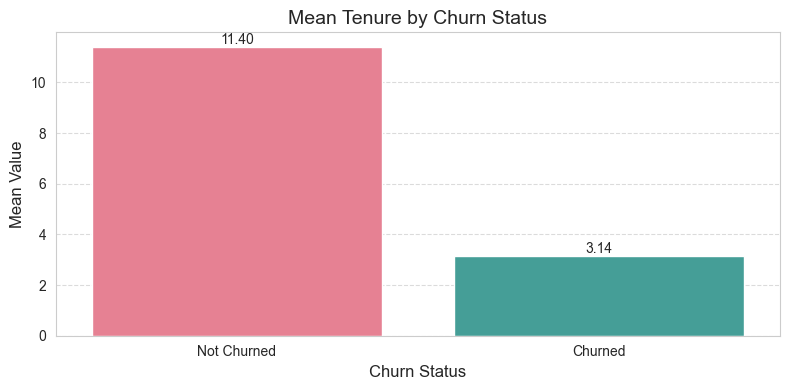

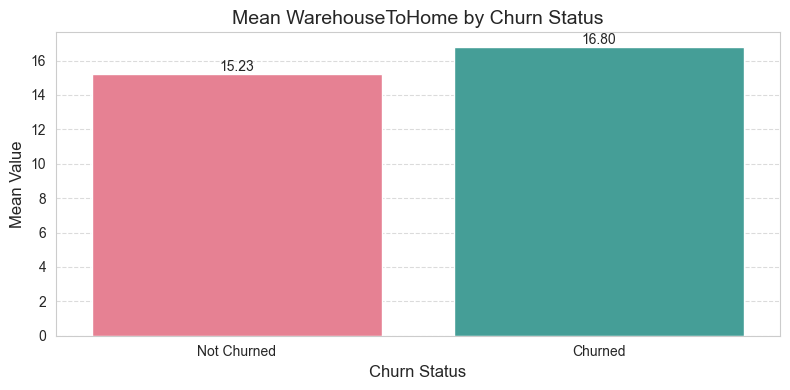

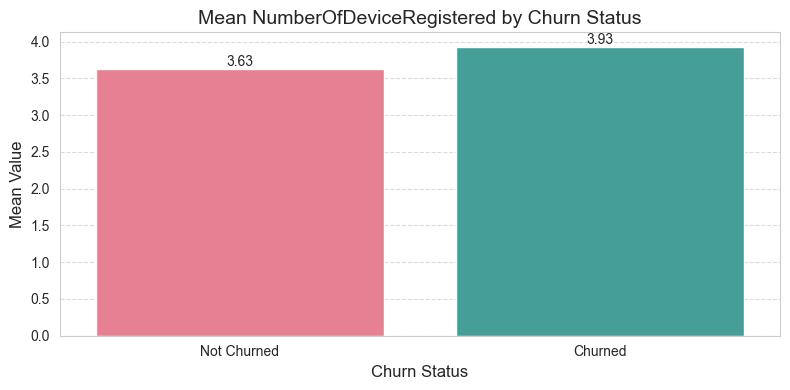

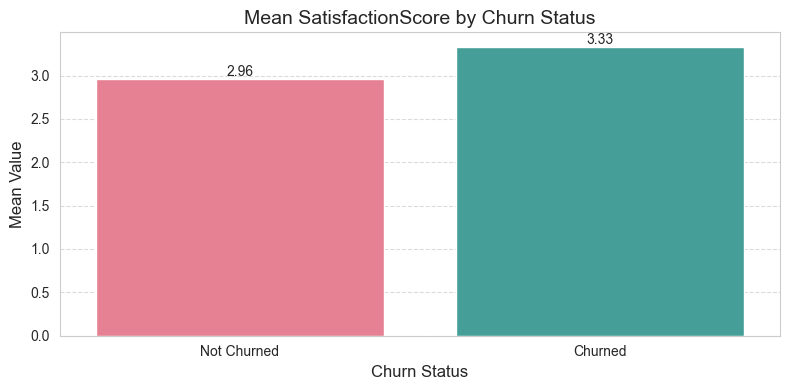

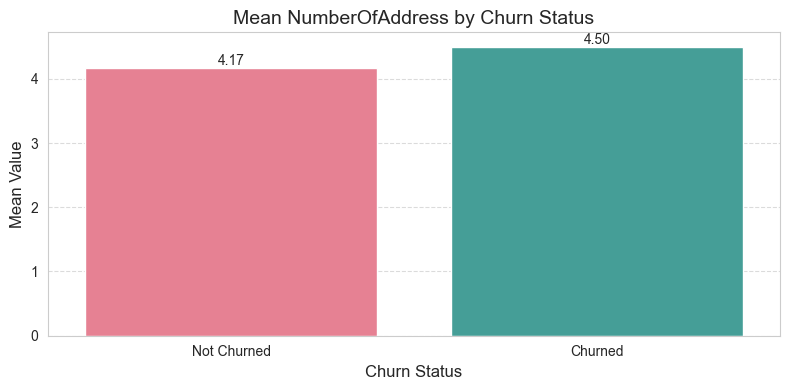

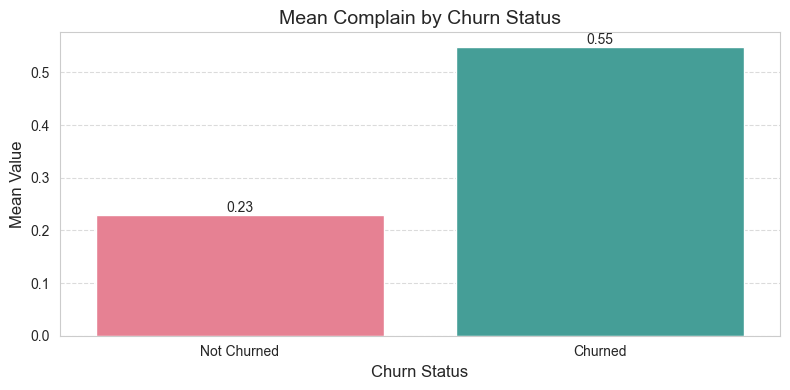

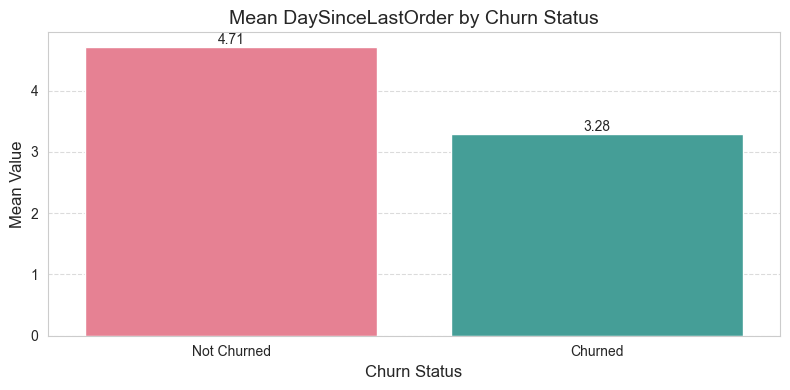

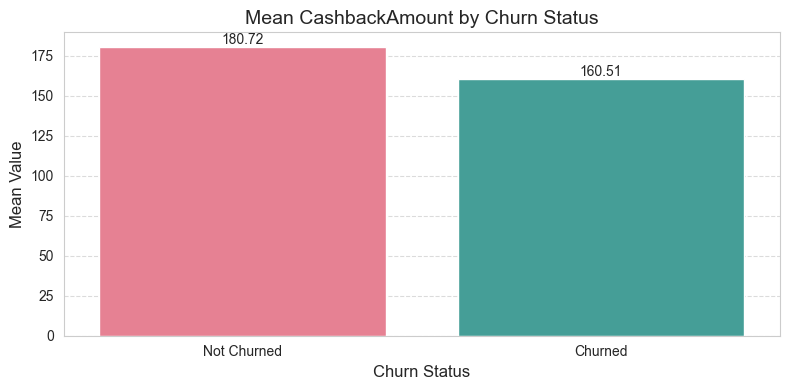

In [210]:
churned = df[df['Churn'] == 1]
not_churned = df[df['Churn'] == 0]

for column in df.select_dtypes(include=['float64', 'int64']):
    if column != 'Churn':  

        mean_churned = churned[column].mean()
        mean_not_churned = not_churned[column].mean()

        plt.figure(figsize=(8, 4))
        sns.barplot(x=['Not Churned', 'Churned'], y=[mean_not_churned, mean_churned], palette='husl')
        
        plt.text(0, mean_not_churned, f'{mean_not_churned:.2f}', ha='center', va='bottom', fontsize=10)
        plt.text(1, mean_churned, f'{mean_churned:.2f}', ha='center', va='bottom', fontsize=10)
        
        plt.ylabel('Mean Value', fontsize=12)
        plt.xlabel('Churn Status', fontsize=12)
        plt.title(f'Mean {column} by Churn Status', fontsize=14)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()


In [211]:
chi_square_results = {}

for column in df.select_dtypes(include=['object']):
    contingency_table = pd.crosstab(df[column], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[column] = {'Chi-square': chi2, 'p-value': p}

chi_square_results_df = pd.DataFrame(chi_square_results).T

print(chi_square_results_df)


                  Chi-square       p-value
PreferedOrderCat  170.813180  6.997391e-36
MaritalStatus     103.993059  2.619354e-23


In [212]:
from scipy.stats import chi2

def post_hoc_analysis(contingency_table, alpha=0.05):
    print("Post hoc analysis results:")
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    if p_val <= alpha:

        critical_value = chi2.ppf(1 - alpha, dof)
        print(f"Chi-square Statistic: {chi2_stat:.4f}, Critical Value: {critical_value:.4f}")

        residuals = (contingency_table - expected) / np.sqrt(expected)
        significant_cells = np.abs(residuals) > 2 
        
        print("\nSignificant Cells (Residuals > 2):")
        print(residuals[significant_cells].round(4))
    else:
        print("No significant association found.")

# Example: Post hoc analysis for a specific categorical column
column = 'PreferedOrderCat'  # Replace with your column name
contingency_table = pd.crosstab(df[column], df['Churn'])
print(f"Post hoc analysis for column '{column}':")
post_hoc_analysis(contingency_table)
print()

# Example: Post hoc analysis for another categorical column
column = 'MaritalStatus'  # Replace with your column name
contingency_table = pd.crosstab(df[column], df['Churn'])
print(f"Post hoc analysis for column '{column}':")
post_hoc_analysis(contingency_table)


Post hoc analysis for column 'PreferedOrderCat':
Post hoc analysis results:
Chi-square Statistic: 170.8132, Critical Value: 9.4877

Significant Cells (Residuals > 2):
Churn                    0       1
PreferedOrderCat                  
Fashion                NaN     NaN
Grocery             2.0673 -4.6794
Laptop & Accessory  2.4825 -5.6192
Mobile Phone       -3.9990  9.0518
Others                 NaN -2.7028

Post hoc analysis for column 'MaritalStatus':
Post hoc analysis results:
Chi-square Statistic: 103.9931, Critical Value: 5.9915

Significant Cells (Residuals > 2):
Churn               0       1
MaritalStatus                
Divorced          NaN     NaN
Married        2.4316 -5.5040
Single        -3.3191  7.5129


Hasil uji statistik menunjukkan bahwa terdapat perbedaan signifikan antara pelanggan Churn dan Non-Churn untuk seluruh features yang dimiliki. Hal ini menunjukkan adanya perbedaan mendasar untuk Churn dan Non-Churn customer.

Beberapa temuan data persebaran data antara kelompok Churn dan Non-Churn:
1. Churn customer cenderung memiliki `Tenure` yang lebih rendah daripada Non-Churn customer, mengindikasikan mereka adalah pelanggan baru yang belum memiliki loyalitas terhadap e-commerce.
1. Churn customer cenderung memiliki tingkat `WarehouseToHouse` yang lebih tinggi daripada Non-Churn customer, mengindikasikan lokasi pengiriman lebih jauh sehingga perlu biaya pengiriman lebih tinggi yang lebih mendorong untuk menjadi Churn.
1. Churn customer cenderung memiliki tingkat `Complaint` yang lebih tinggi daripada Non-Churn, indikasi bahwa mereka pernah mendapat pengalaman buruk ketika menggunakan layanan e-commerece sehingga menjadi Churn.
1. Churn customer cenderung memiliki tingkat `CashbackAmount` yang lebih rendah dibanding Non-Churn, indikasi bahwa mereka mendapat lebih sedikit insentif dari e-commerce untuk terus berbelanja sehingga menjadi Churn.
1. Churn customer cenderung datang dari kelompok pembeli barang `Mobile Phone`, sementara Non-Churn datang dari kelompok pembeli barang `Groceries`. Hal ini cukup wajar mengingat karakteristik barang antar kedua kelompok tersebut dimana Handphone bukan jadi barang yang 'fastmoving' seperti Groceries.

Namun ada beberapa keunikan yang terjadi dari dataset Churn ini, dimana pelanggan Churn memiliki karakteristik yang menunjukkan tingkat kepuasan lebih tinggi dari Non-Churn dan histori pembelanjaan yang lebih baru. Temuan ini bertolak belakang dengan logika untuk hal yang mendorong pelanggan menjadi Churn dari sebuah layanan tertentu.

Dari hasil analisa data awal ini akan dijadikan salah satu acuan tambahan dalam pembuatan model


<hr>

# **E. DATA PREPARATION**


Setelah melakukan penanganan dan pengecekan missing value, outliers, dan data error. Tahapan selanjutnya sebelum pembuatan model adalah mempersiapkan dataset melalui proses data pre-processing.

In [213]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.000000,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.000000,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.000000,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,5.833333,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.000000,322.17,0


## **E.1. Data Splitting**

Menentukan Features dan Target

In [214]:
X = df[['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']]
y = df['Churn']

Membagi train dan test data

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020, stratify=y)

display(X_train.shape, X_test.shape)

(2616, 10)

(654, 10)

## **E.2. Data Preprocesssing (Encoding & Scaling)**

Setelah melakukan data splitting, selanjutnya kita masuk ke tahap preprocessing dan feature engineering, yaitu: **Encoding** dan **Scaling**

Encoding:
- Encoding akan dilakukan pada column yang bertipe kategorik yaitu `MaritalStatus` dan `PreferedOrderCat`. Encoding diperlukan agar proses pengujian model dapat dilakukan.
- Encoding adalah proses mengkonversi data kategorik menjadi data numerik sehingga data dapat diproses oleh algoritma machine learning.
- Mempertimbangkan kategori yang dimiliki setiap column tidak terlalu banyak (antara 1 - 5) dan tidak bersifat ordinal. Maka metode yang digunakan adalah **One Hot Encoding**

Scaling:
- Scaling adalah melakukan transformasi data numerik yang bertujuan membuat skala yang sama untuk setiap column.
- Kolom `Complain` memiliki 2 unique data yang sudah berbentuk 0 dan 1, sehingga tidak diperlukan proses scaling.
- Kolom `Tenure`, `WarehouseToHome`, `NumberOfDeviceRegistered`, `SatisfactionScore`, `NumberOfAddress`, `DaySinceLastOrder`, `CashbackAmount` akan dilakukan proses Scaling.
- Proses scalling akan menggunakan **Robust Scaler** dengan pertimbangan data terdistribusi secara skewed dan ada sejumlah outlier yang dipertahankan dalam dataset.

Pertama adalah membuat definisi encoder-nya

In [216]:
transformer = ColumnTransformer([
    ('One Hot Encoding', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus']),
    ('Robust', RobustScaler(), ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount', 'SatisfactionScore']),
], remainder='passthrough')

Selanjutnya adalah fit ke data train

In [217]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot Encoding',
                                 OneHotEncoder(drop='first'),
                                 ['PreferedOrderCat', 'MaritalStatus']),
                                ('Robust', RobustScaler(),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered', 'NumberOfAddress',
                                  'DaySinceLastOrder', 'CashbackAmount',
                                  'SatisfactionScore'])])

In [218]:
testing = pd.DataFrame(transformer.fit_transform(X_train), columns=transformer.get_feature_names_out())
testing.head()

,One Hot Encoding__PreferedOrderCat_Grocery,One Hot Encoding__PreferedOrderCat_Laptop & Accessory,One Hot Encoding__PreferedOrderCat_Mobile Phone,One Hot Encoding__PreferedOrderCat_Others,One Hot Encoding__MaritalStatus_Married,One Hot Encoding__MaritalStatus_Single,Robust__Tenure,Robust__WarehouseToHome,Robust__NumberOfDeviceRegistered,Robust__NumberOfAddress,Robust__DaySinceLastOrder,Robust__CashbackAmount,Robust__SatisfactionScore,remainder__Complain
0,0.0,0.0,0.0,1.0,1.0,0.0,1.250000,-0.363636,0.0,0.50,0.200000,2.910652,-1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.833333,-0.636364,-1.0,0.25,0.133333,1.048896,-0.5,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,-0.666667,-0.636364,0.0,0.75,8.600000,0.801794,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.500000,-0.545455,0.0,0.75,0.200000,0.497257,-1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,-0.250000,-0.454545,-1.0,-0.50,0.600000,-0.637123,-1.0,0.0


Setelah selesai melakukan proses data pre-processsing, maka data telah siap untuk pengujian model

<hr>

# **F. MODEL TESTING & SELECTION**


List model yang akan diuji

In [219]:
logreg = LogisticRegression(random_state=2020)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=2020) 
rf = RandomForestClassifier(random_state=2020) 
ada = AdaBoostClassifier(tree, random_state=2020)
gbc = GradientBoostingClassifier(random_state=2020)
xgb = XGBClassifier(random_state=2020)
lgbm = LGBMClassifier(random_state=2020)

## **F.1 Modeling: default parameter**


### **Model benchmarking: default parameter**

Proses pengujian model benchmarking akan menggunakan cross validation dengan tipe : `Stratified K-Fold` dengan data split sebanyak n = 5. Tipe ini dipilih agar setiap pembagian K-fold data tetap memperhatikan distribusi kelas yang setara seperti distribusi dataset asli. Ini penting mengingat dataset yang skewed/tidak terdistribusi normal.

In [220]:
models = [logreg, knn, tree, rf, ada, gbc, xgb, lgbm]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GBoost', 'XGBoost', 'LightGBM']
score = []
mean = []
std = []

for model in models:
    skfold = StratifiedKFold(n_splits=5)
    estimator_default = Pipeline([
        ('preprocess', transformer),
        ('model', model)
    ])
    model_cv = cross_val_score(estimator_default, X_train, y_train, cv=skfold, scoring='f1')
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())

results_df = pd.DataFrame({
    'model': model_names,
    'mean F1 Score': mean,
    'StdDev': std
}).set_index('model').sort_values(by='mean F1 Score', ascending=False)

results_df.round(3)


[LightGBM] [Info] Number of positive: 341, number of negative: 1751
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 427
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163002 -> initscore=-1.636060
[LightGBM] [Info] Start training from score -1.636060
[LightGBM] [Info] Number of positive: 342, number of negative: 1751
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 2093, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163402 -> initscore=-1.633132
[LightGBM] [Info] Start training from score -1.633132
[LightGBM] [Info] Numb

,mean F1 Score,StdDev
model,,
XGBoost,0.738,0.032
LightGBM,0.734,0.024
GBoost,0.683,0.067
Random Forest,0.677,0.050
AdaBoost,0.670,0.043
Decision Tree,0.662,0.052
Logistic Regression,0.572,0.058
KNN,0.534,0.017


Berdasarkan hasil uji model dengan data train, terindikasi bahwa model `XGBoost` dan `LGBM` memiliki performa skor F1 paling tinggi diantara model lain dengan rata-rata berada di skor 0.738 dan 0.734.

Hasil ini belum memberikan kesimpulan konklusif untuk mendapatkan model uji terbaik.

### **Model Evaluation: Default parameter**

Setelah mendapatkan hasil uji model di data test, mari kita coba cek bagaimana performa model melalui evaluasi di data test dengan parameter default

In [221]:
models = [logreg, knn, tree, rf, ada, gbc, xgb, lgbm]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GBoost', 'XGBoost', 'LightGBM']
Score_F1 = []

def y_pred_func(model):
    estimator_default = Pipeline([
        ('preprocess', transformer),
        ('model', model)
    ])
    estimator_default.fit(X_train, y_train)
    y_pred = estimator_default.predict(X_test)
    return y_pred

for model, model_name in zip(models, model_names):
    y_pred = y_pred_func(model)
    f1 = f1_score(y_test, y_pred)
    Score_F1.append(f1)
    print(f"{model_name} \n{classification_report(y_test, y_pred)}")

results_df = pd.DataFrame({
    'Model': model_names,
    'F1 score': Score_F1
}).sort_values(by='F1 score', ascending=False)

results_df.round(3)


Logistic Regression 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       547
           1       0.76      0.50      0.61       107

    accuracy                           0.89       654
   macro avg       0.83      0.74      0.77       654
weighted avg       0.88      0.89      0.88       654

KNN 
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       547
           1       0.76      0.44      0.56       107

    accuracy                           0.89       654
   macro avg       0.83      0.71      0.75       654
weighted avg       0.88      0.89      0.87       654

Decision Tree 
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       547
           1       0.68      0.79      0.73       107

    accuracy                           0.91       654
   macro avg       0.82      0.86      0.84       654
weighted avg       0.91      0.91

,Model,F1 score
6,XGBoost,0.783
7,LightGBM,0.780
3,Random Forest,0.758
2,Decision Tree,0.730
4,AdaBoost,0.716
5,GBoost,0.715
0,Logistic Regression,0.607
1,KNN,0.556


Berdasarkan hasil uji model dengan data test dengan parameter default menunjukkan konsistensi hasil dimana model `XGBoost` dan `LGBM` memiliki performa paling tinggi diantara model lain. Selain itu, kedua model ini juga menunjukkan peningkatan performa skor F1 sekitar 6%. Namun hasil serupa masih terjadi dimana kedua model memiliki performa yang setara sehingga kita belum bisa mengambil kesimpulan konklusif dalam memilih model terbaik.

Selanjutnya, kita akan mencoba melakukan tuning di parameter kedua model potensial.

## **F.2. Modeling: Tuning parameter**


Agar dapat mengetahui model yang paling tepat antara `LGBM` dan `XGBoost`, mari kita coba ubah beberapa parameter pengujiannya terlebih dahulu. Parameter yang akan kita coba adalah sebagai berikut:
- Class weight
- Polynomial
- Feature selection
- Oversampling/imbalance class

### **Model benchmark: Class weight**


Saat ini kita mencoba pakai Class Weight `Balanced` dalam parameter model. Penggunaan parameter class_weight untuk mengatasi masalah ketidakseimbangan dalam dataset. Mengingat dataset ini skewed terhadap kelompok churn, maka dapat menyebabkan model machine learning cenderung mengklasifikasikan kelompok mayoritas dengan lebih baik daripada kelompok minoritas.

In [222]:
class_counts = df['Churn'].value_counts()

number_of_churn_instances = class_counts[1]
number_of_not_churn_instances = class_counts[0]
scale_pos_weight_value = number_of_not_churn_instances / number_of_churn_instances

xgb = XGBClassifier(random_state=2020, scale_pos_weight=scale_pos_weight_value)
lgbm = LGBMClassifier(random_state=2020, class_weight = 'balanced')

In [223]:
models = [xgb, lgbm]
model_names = ['XGBoost', 'LightGBM']
score = []
mean = []
std = []

for model in models:
    skfold = StratifiedKFold(n_splits=5)
    estimator_tuning = Pipeline([
        ('preprocess', transformer),
        ('model', model)
    ])
    model_cv = cross_val_score(estimator_tuning, X_train, y_train, cv=skfold, scoring='f1')
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())

results_df = pd.DataFrame({
    'model': model_names,
    'mean F1 Score': mean,
    'StdDev': std
}).set_index('model').sort_values(by='mean F1 Score', ascending=False)

results_df.round(3)


[LightGBM] [Info] Number of positive: 341, number of negative: 1751
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 427
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 342, number of negative: 1751
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 2093, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number

,mean F1 Score,StdDev
model,,
LightGBM,0.753,0.016
XGBoost,0.742,0.035


Hasil tuning `class_weight`:
- Tuning menggunakan `class_weight` balanced secara umum berhasil meningkatkan performa kedua model di data train. Penggunaan parameter class_weight efektif menyeimbangkan dataset yang tidak merata, sehingga berdampak terhadap performa model yang lebih baik. Ke depannya, kita akan menggunakan class_weight balanced ini dalam tuning parameter model selanjutnya.
- Terkait pemilihan model, class_weight mampu memberikan peningkatan performa lebih baik pada model LightGBM. LightGBM dengan `class_weight` balanced = 0.753 (dibandingkan dengan XGBoost = 0.742). 
- Oleh karena itu model yang akan dipilih untuk lebih lanjut adalah LightGBM.


### **Model benchmark: Polynomial features**

Selanjutnya, kita akan mengecek performa model apabila melakukan tuning dengan menggunakan polynomial feature.

Polynomial feature adalah proses mengubah/menggabungkan fitur asli dalam column menjadi sejumlah fitur baru dengan tujuan supaya dapat menangkap hubungan yang lebih kompleks antara fitur dan target sehingga dapat meningkatkan akurasi model yang lebih baik.

Proses yang dipakai adalah menggunakan library `PolynomialFeatures()` dalam proses transform fit ke data train

In [224]:
transformer_polynomial = ColumnTransformer([
    ('One Hot Encoding', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus']),
    ('Poly', PolynomialFeatures(), ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount', 'SatisfactionScore']),
    ('Robust', RobustScaler(), ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount', 'SatisfactionScore']),    
], remainder='passthrough')

In [225]:
transformer_polynomial.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot Encoding',
                                 OneHotEncoder(drop='first'),
                                 ['PreferedOrderCat', 'MaritalStatus']),
                                ('Poly', PolynomialFeatures(),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered', 'NumberOfAddress',
                                  'DaySinceLastOrder', 'CashbackAmount',
                                  'SatisfactionScore']),
                                ('Robust', RobustScaler(),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered', 'NumberOfAddress',
                                  'DaySinceLastOrder', 'CashbackAmount',
                                  'SatisfactionScore'])])

In [226]:
testing_polynomial = pd.DataFrame(transformer_polynomial.fit_transform(X_train), columns=transformer_polynomial.get_feature_names_out())
testing_polynomial.head()

,One Hot Encoding__PreferedOrderCat_Grocery,One Hot Encoding__PreferedOrderCat_Laptop & Accessory,One Hot Encoding__PreferedOrderCat_Mobile Phone,One Hot Encoding__PreferedOrderCat_Others,One Hot Encoding__MaritalStatus_Married,One Hot Encoding__MaritalStatus_Single,Poly__1,Poly__Tenure,Poly__WarehouseToHome,Poly__NumberOfDeviceRegistered,...,Poly__CashbackAmount SatisfactionScore,Poly__SatisfactionScore^2,Robust__Tenure,Robust__WarehouseToHome,Robust__NumberOfDeviceRegistered,Robust__NumberOfAddress,Robust__DaySinceLastOrder,Robust__CashbackAmount,Robust__SatisfactionScore,remainder__Complain
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,23.0,9.0,4.0,...,316.61,1.0,1.250000,-0.363636,0.0,0.50,0.200000,2.910652,-1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0,6.0,3.0,...,438.08,4.0,1.833333,-0.636364,-1.0,0.25,0.133333,1.048896,-0.5,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,6.0,4.0,...,618.27,9.0,-0.666667,-0.636364,0.0,0.75,8.600000,0.801794,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,14.0,7.0,4.0,...,190.13,1.0,0.500000,-0.545455,0.0,0.75,0.200000,0.497257,-1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,8.0,3.0,...,130.68,1.0,-0.250000,-0.454545,-1.0,-0.50,0.600000,-0.637123,-1.0,0.0


In [227]:
models = [lgbm]
model_names = ['LightGBM_PolynomialFeature']
score = []
mean = []
std = []

for model in models:
    skfold = StratifiedKFold(n_splits=5)
    estimator_tuning = Pipeline([
        ('preprocess', transformer_polynomial),
        ('model', model)
    ])
    model_cv = cross_val_score(estimator_tuning, X_train, y_train, cv=skfold, scoring='f1')
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())

results_df = pd.DataFrame({
    'model': model_names,
    'mean F1 Score': mean,
    'StdDev': std
}).set_index('model').sort_values(by='mean F1 Score', ascending=False)

results_df.round(3)


[LightGBM] [Info] Number of positive: 341, number of negative: 1751
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000747 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4359
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 342, number of negative: 1751
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4361
[LightGBM] [Info] Number of data points in the train set: 2093, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Numb

,mean F1 Score,StdDev
model,,
LightGBM_PolynomialFeature,0.736,0.05


Penghitungan skor F1 pada model tanpa menggunakan polynomial secara umum lebih baik dibandingkan dengan polynomial. Performa skor F1 model LGBM tanpa polynomial = 0.753 sedangan dengan Polynomial = 0.736. Oleh karena itu, kita tidak akan menggunakan polynomial dalam tuning parameter model.

### **Model benchmarking: Feature selection**

Selanjutnya adalah melakukan tuning pada feature selection.

Secara definisi, Feature selection adalah proses memilih fitur (variabel, atribut, column) yang paling relevan dalam pembuatan model. Tujuannya adalah untuk meningkatkan efisiensi dan efektivitas model dengan menghilangkan fitur yang tidak perlu atau berlebihan.

Pada proses pembuatan model kali ini, tipe feature yang digunakan adalah `Recursive Feature Elimination`. RFE bekerja dengan memilih fitur dengan cara iteratif berdasarkan pentingnya fitur untuk model. Alasan mengapa RFE ini dipilih karena keunggulannya dalam *fokus pada kinerja model* (Langsung menggunakan model untuk menilai pentingnya fitur sehingga hasil subset fitur lebih efektif dalam meningkatkan kinerja model.) dan mengurangi redundansi.
- Estimator yang akan dipakai dan diuji dalam proses ini adalah: `RandomForest` dan `LogisticRegression`


In [228]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616 entries, 0 to 2615
Data columns (total 14 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   One Hot Encoding__PreferedOrderCat_Grocery             2616 non-null   float64
 1   One Hot Encoding__PreferedOrderCat_Laptop & Accessory  2616 non-null   float64
 2   One Hot Encoding__PreferedOrderCat_Mobile Phone        2616 non-null   float64
 3   One Hot Encoding__PreferedOrderCat_Others              2616 non-null   float64
 4   One Hot Encoding__MaritalStatus_Married                2616 non-null   float64
 5   One Hot Encoding__MaritalStatus_Single                 2616 non-null   float64
 6   Robust__Tenure                                         2616 non-null   float64
 7   Robust__WarehouseToHome                                2616 non-null   float64
 8   Robust__NumberOfDeviceRegistered                

In [229]:
feature_selection_RF = RFE(estimator=RandomForestClassifier(random_state=2020), n_features_to_select=10)
feature_selection_LR = RFE(estimator=LogisticRegression(random_state=2020), n_features_to_select=10)

feature_selection = [feature_selection_RF, feature_selection_LR, None]
model_names = ['LightGBM_RF', 'LightGBM_LR', 'LightGBM']

score = []
mean = []
std = []

for i in feature_selection:
    skfold = StratifiedKFold(n_splits=5)
    estimator_tuning = Pipeline([
        ('preprocess', transformer),
        ('feature_selector', i),
        ('model', lgbm)
    ])
    model_cv = cross_val_score(estimator_tuning, X_train, y_train, cv=skfold, scoring='f1')
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())

results_df = pd.DataFrame({
    'model': model_names,
    'mean F1 Score': mean,
    'StdDev': std
}).set_index('model').sort_values(by='mean F1 Score', ascending=False)

results_df.round(3)


[LightGBM] [Info] Number of positive: 341, number of negative: 1751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 419
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 342, number of negative: 1751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 2093, number of used features: 10
[LightGBM] [Info] [binary:Bo

,mean F1 Score,StdDev
model,,
LightGBM_RF,0.755,0.021
LightGBM,0.753,0.016
LightGBM_LR,0.700,0.040


Analisa performa berdasarkan tipe estimator yang diuji, `RandomForest` menunjukkan hasil yang lebih baik karena model ini berhasil sedikit meningkatkan performa. Berbandinhg terbalik dengan `LogisticRegression` yang malah memberikan performa lebih buruk.

Namun, analisa performa model yang diuji masih belum dapat memberikan hasil yang lebih konklusif dikarenakan Skor F1 model LightGBM dengan Feature Selection `RandomForest` dan tanpa Feature selection menunjukkan performa yang setara. Oleh karena itu, kita akan menggunakan feature selection dan tanpa feature selection karena masih mencari score tertinggi diantara keduanya.


*Catatan: setelah melakukan beberapa experiment paramater `n_features_to_select` = 10 mendapatkan score tertinggi sehingga digunakan untuk proses benchmarking.*

### **Model benchmarking: Oversampling**

Selanjutnya adalah pengujian tuning melalui proses teknik oversampling. 

1. Oversampling adalah teknik pengolahan data untuk menangani ketidakseimbangan kelompok/proporsi dalam dataset.
1. Tujuan oversampling adalah untuk meningkatkan representasi kelompok minoritas dengan menambahkan kembali sampel-sampel dari kelompok tersebut
1. Keuntungan dari oversampling adalah meningkatkan kinerja model pada kelompok minoritas dengan memberikan lebih banyak informasi kepada model tentang kelompok minoritas tersebut. 

Mengingat pada dataset e-commerce churn ini memiliki jumlah kelompok pelanggan Churn yang jauh lebih sedikit dibandingkan kelompok pelanggan Non-churn, hal ini berpotensi berpengaruh terhadap kualitas dan akurasi model yang akan dibangun. Oleh karena itu, teknik oversampling diharapkan dapat meningkatkan performa dengan cara membuat kelompok Churn memiliki jumlah lebih representatif.

Beberapa teknik oversampling yang akan diuji adalah:
- SMOTE (Synthetic Minority Over-sampling Technique)
- ADASYN (Adaptive Synthetic Sampling)
- SMOTEENN (Synthetic Minority Over-sampling Technique and Edited Nearest Neighbors)
- Random Oversampling

Kita akan menguji teknik oversampling manakah yang memberikan performa terbaik untuk kedua variasi model saat ini `LightGBM_RandomForest` (LightGBM dengan feature selection Random Forest) dan `LightGBM` (LightGBM tanpa feature selection)

In [230]:
# Import oversampling method
Smote = SMOTE(random_state = 2020)
Adasyn = ADASYN(random_state=2020)
Smoteeen = SMOTEENN(random_state=2020)
Ros = RandomOverSampler(random_state=2020)

**Model Benchmark Oversampling (tanpa feature selection)**

In [231]:
Oversampler_Selection = [Smote, Adasyn, Smoteeen,Ros, None]
model_names = ['LightGBM_smote', 'LightGBM_adasyn','LightGBM_smoteeen', 'LightGBM_ros', 'LightGBM']

score = []
mean = []
std = []

for i in Oversampler_Selection:
    skfold=StratifiedKFold(n_splits=5)
    estimator_tuning =Pipeline([
        ('preprocess',transformer),
        ('resampler',i),
        ('model',lgbm)])
    model_cv = cross_val_score(estimator_tuning, X_train, y_train, cv=skfold, scoring='f1')
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())
        
results_df = pd.DataFrame({
    'model': model_names,
    'mean F1 Score': mean,
    'StdDev': std
}).set_index('model').sort_values(by='mean F1 Score', ascending=False)

results_df.round(3)

[LightGBM] [Info] Number of positive: 1751, number of negative: 1751
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2022
[LightGBM] [Info] Number of data points in the train set: 3502, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1751, number of negative: 1751
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2039
[LightGBM] [Info] Number of data points in the train set: 3502, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1751, number of negative: 1751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, t

,mean F1 Score,StdDev
model,,
LightGBM_ros,0.754,0.025
LightGBM,0.753,0.016
LightGBM_smote,0.727,0.048
LightGBM_adasyn,0.726,0.035
LightGBM_smoteeen,0.680,0.033


**Model Benchmark Oversampling (dengan feature selection)**

In [232]:
Oversampler_Selection = [Smote, Adasyn, Smoteeen,Ros, None]
model_names = ['LightGBM_smote', 'LightGBM_adasyn','LightGBM_smoteeen', 'LightGBM_ros', 'LightGBM']

score = []
mean = []
std = []

for i in Oversampler_Selection:
    skfold=StratifiedKFold(n_splits=5)
    estimator_tuning =Pipeline([
        ('preprocess',transformer),
        ('feature_selection', feature_selection_RF),
        ('resampler',i),
        ('model',lgbm)])
    model_cv = cross_val_score(estimator_tuning, X_train, y_train, cv=skfold, scoring='f1')
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())
        
results_df = pd.DataFrame({
    'model': model_names,
    'mean F1 Score': mean,
    'StdDev': std
}).set_index('model').sort_values(by='mean F1 Score', ascending=False)

results_df.round(3)

[LightGBM] [Info] Number of positive: 1751, number of negative: 1751
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1935
[LightGBM] [Info] Number of data points in the train set: 3502, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1751, number of negative: 1751
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1937
[LightGBM] [Info] Number of data points in the train set: 3502, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1751, number of negative: 1751
[LightGBM] [Info] Auto-choosing col-wise multi-threading, t

[LightGBM] [Info] Number of positive: 341, number of negative: 1751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 419
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 342, number of negative: 1751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 2093, number of used features: 10
[LightGBM] [Info] [binary:Bo

,mean F1 Score,StdDev
model,,
LightGBM,0.755,0.021
LightGBM_ros,0.749,0.025
LightGBM_smote,0.724,0.041
LightGBM_adasyn,0.720,0.044
LightGBM_smoteeen,0.684,0.024


Berdasarkan hasil uji oversampling di kedua varian model LightGBM; Dengan Feature Selection vs Tanpa Feature Selection, hasil yang ditemukan adalah:
- Secara umum, teknik oversampling RandomOverSampler memiliki performa paling baik diantara teknik lainnya di kedua varian model yang diuji
- Teknik RandomOverSampler menunjukkan performa lebih baik pada uji model LightGBM tanpa feature selection (0.754 vs 0.749)
- Dari skor F1 pada seluruh model yang diuji di data training, LightGBM (tanpa feature selection memiliki performa yang sedikit lebih baik. Mempertimbangkan kondisi tersebut maka model yang akan dipakai dalam studi kasus ini adalah model **LightGBM (dengan Feature Selection RandomForest)**.

Setelah mendapatkan model yang akan digunakan, langkah selanjutnya adalah melakukan tuning kembali dengan teknik hyperparameter tuning.

## **F.3. Model explanation - LightGBM**

LightGBM secara definisi adalah sebuah model Machine Learning yang menggunakan algoritma tree based learning sebagai dasar kerangkanya. Algoritma LightGBM dengan prinsip boosting yang bekerja dengan menggabungkan beberapa model lemah (weak leaner) dengan memberikan bobot lebih tinggi untuk data yang terprediksi salah secara iterative. Dari proses iterative ini, model kemudian mentransform model lemah (weak learner) menjadi model yang lebih baik.

Secara umum, konsep/prinsip kerja LightGBM/Gradient boosting model adalah sebagai berikut:

![Gradient Boosting concept](https://www.researchgate.net/publication/351542039/figure/fig1/AS:11431281172877200@1688685833363/Flow-diagram-of-gradient-boosting-machine-learning-method-The-ensemble-classifiers.png)


Keunggulan LightGBM dibandingkan gradient boosting model lainnya adalah
- Memiliki kecepatan lebih baik dan efisiensi lebih tinggi dalam proses pelatihan model
- Penggunaan memori lebih rendah
- Akurasi lebih baik
- Kemampuan menangani data berskala besar

Reference: https://lightgbm.readthedocs.io/en/v3.3.2/



<hr>

# **G. HYPERPARAMETER TUNING**

Setelah berhasil menentukan model terbaik untuk proses prediksi klasifikasi churn,  yaitu (LightGBM dengan feature selection RandomForest). Langkah selanjutnya adalah melakukan Hypertuning Parameter. 
- Hypertuning parameter adalah proses optimalisasi dari nilai-nilai hyperparameter dalam suatu model pembelajaran mesin atau algoritma pembelajaran statistik. Tujuan dari hyperparameter tuning adalah untuk menemukan kombinasi hyperparameter yang menghasilkan kinerja model terbaik pada dataset validasi atau uji.

Pada proses ini, kita akan mengoptimasi parameter yang ada dalam model LightGBM. Langkah pertama adalah cek parameter yang dimiliki oleh model ini

In [233]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': 'balanced',
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 2020,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

Kita tidak akan mengoptimasi seluruh parameter, melainkan hanya parameter yang memiliki fungsi penting dalam meningkatkan performa model keseluruhan. Parameter yang akan dioptimasi adalah:
- `max_bin`: Mengatur jumlah maksimum bins yang akan dimasukkan ke feature. Mengurangi nilai parameter ini dapat meningkatkan training speed.
- `num_leaves`: Mengatur kompleksitas model tree, menjaga model dari overfitting. Selain itu tuning yang tepat dapat memberikan akurasi yang baik pada model
- `min_data_in_leaf`: Penting untuk menjaga model dari overfitting pada leaf-wise tree. Setting dengan nilai yang terlalu besar dapat menghindari dari pembentukan tree yang terlalu tapi resiko terhadap underfitting. 
- `num_iterations`: Mengatur jumlah boosting rounds yang akan dilakukan, dapat dikatakan juga sebagai jumlah tree yang akan dibentuk ketika proses tuning. Mengurangi nilai parameter ini dapat menurunkan training time
- `learning_rate`: Mengatur training accuracy ketika terdapat perubahan pada parameter `num_iterations`. Ketika `num_iteration` diturunkan, maka `learning_rate` perlu dinaikkan.

Default hyperparameter LGBM => `max_bin` = 255, `num_leaves` = 31, `min_data_in_leaf` = 20, `num_iterations` = 100, `learning_rate` = 0.1

Ketika sudah menentukan parameter yang akan dituning, selanjutnya adalah persiapan dan proses eksekusi tuning parameter tersebut.

In [234]:
lgbm_tuning = LGBMClassifier(random_state=2020, class_weight= 'balanced')

estimator_tuning =imblearn.pipeline.Pipeline([
    ('preprocess',transformer),
    ('feature_selection', feature_selection_RF),
    ('model',lgbm_tuning)
])

Parameter yang akan dituning:

*notes: value yang ditampilkan hanya hasil akhir dari serangkaian pengujian sebelumnya hingga menemukan value yang optimal*

In [235]:
hyperparam_space=[{
    'model__max_bin': [250, 275, 300],
    'model__num_leaves':[17, 21, 25],
    'model__min_data_in_leaf': [7, 10, 13],
    'model__num_iterations':[175,200,225],
    'model__learning_rate': [0.100, 0.125, 0.150],
    'model__random_state': [2020]
}]

In [236]:
# ----HANYA UNTUK KEPERLUAN SAAT PEMBUATAN CAPSTONE AGAR MEMPERSINGKAT WAKTU RUNNING CODE----  

# hyperparam_space=[{
#     'model__max_bin': [275, 300],
#     'model__num_leaves':[21, 25],
#     'model__min_data_in_leaf': [7, 10],
#     'model__num_iterations':[200,225],
#     'model__learning_rate': [0.125, 0.150],
#     'model__random_state': [2020]
# }]

Dalam proses tuningnya, hyperparameter tuning memiliki sejumlah teknik seperti GridSearch dan RandomSearch. Pada kasus ini kita akan menggunakan teknik GridSearch. Pertimbangan menggunakan GridSearch karena teknik ini menguji seluruh kemungkinan kombinasi parameter yang diuji dalam berupa 'grid'. Dampaknya adalah hasil yang lengkap sehingga dapat memberikan tuning yang paling optimal terhadap metrik yang digunakan (F1 Score)

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


In [237]:
grid = GridSearchCV(estimator_tuning, n_jobs=-1, param_grid=hyperparam_space, scoring='f1', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=2020))

In [238]:
grid.fit(X_train,y_train)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Number of positive: 427, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 2616, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot '
                                                                         'Encoding',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('Robust',
                                                                         RobustScaler(),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'NumberOfDeviceRegistered',
                                                                          'NumberOfAd...
                                        RFE(estimator=RandomForestClassifier(random_state=2020),
                                            n_features_to_select=10)),
                                       ('model',
                                        LGBMClassifier(class_weight='balanced',
                                                       random_state=2020))]),
             n_jobs=-1,
             param_grid=[{'model__learning_rate': [0.1, 0.125, 0.15],
                          'model__max_bin': [250, 275, 300],
                          'model__min_data_in_leaf': [7, 10, 13],
                          'model__num_iterations': [175, 200, 225],
                          'model__num_leaves': [17, 21, 25],
                          'model__random_state': [2020]}],
             scoring='f1')

In [239]:
print('LightGBM_Hyperparameter_Tuning')
print('Best_score:', grid.best_score_)
print('Best_params:', grid.best_params_)

LightGBM_Hyperparameter_Tuning
Best_score: 0.7641816503903854
Best_params: {'model__learning_rate': 0.125, 'model__max_bin': 275, 'model__min_data_in_leaf': 10, 'model__num_iterations': 200, 'model__num_leaves': 21, 'model__random_state': 2020}


In [240]:
# create dataframe
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_bin,param_model__min_data_in_leaf,param_model__num_iterations,param_model__num_leaves,param_model__random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
121,5.256658,0.422859,0.021767,0.002037,0.125,275,10,200,21,2020,"{'model__learning_rate': 0.125, 'model__max_bi...",0.711111,0.774566,0.784530,0.809524,0.741176,0.764182,0.034420,1
156,5.069832,0.290817,0.025848,0.004985,0.125,300,13,200,17,2020,"{'model__learning_rate': 0.125, 'model__max_bi...",0.720000,0.779070,0.761364,0.804734,0.740331,0.761100,0.029487,2
124,5.888849,1.114022,0.022365,0.002344,0.125,275,10,225,21,2020,"{'model__learning_rate': 0.125, 'model__max_bi...",0.715909,0.764706,0.773481,0.819277,0.730539,0.760782,0.036129,3


Parameter terbaik untuk Model LGBM dari hypertuning parameter adalah:
- `max_bin`: 275
- `num_leaves`: 21
- `min_data_in_leaf`: 10
- `num_iterations`: 200
- `learning_rate`: 0.125

Selain itu melalui hyperparameter tuning kita dapat melihat indikasi atas peningkatan performa score F1 model LightGBM ini ke range 0.764 (sebelumnya sekitar 7.54). Hal ini semakin menunjukkan bahwa tuning yang dilakukan mampu memberikan performa lebih baik kepada model.

<hr>

# **H. MODEL EVALUATION**


Setelah mendapatkan hasil optimasi hyperparameter tuning, langkah selanjutnya adalah evaluasi model dengan membandingkan hasil akhir performa model antara sebelum dan sesudah tuning parameter + hyperparameter.

In [241]:
lgbm_default= LGBMClassifier(random_state=2020)

estimator_default=Pipeline([
    ('preprocess',transformer),
    ('model',lgbm_default)
])

estimator_default.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 427, number of negative: 2189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 2616, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163226 -> initscore=-1.634416
[LightGBM] [Info] Start training from score -1.634416


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot Encoding',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('Robust', RobustScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'NumberOfAddress',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount',
                                                   'SatisfactionScore'])])),
                ('model', LGBMClassifier(random_state=2020))])

In [242]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Number of positive: 427, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 2616, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot Encoding',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('Robust', RobustScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'NumberOfAddress',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount',
                                                   'SatisfactionScore'])])),
                ('feature_selection',
                 RFE(estimator=RandomForestClassifier(random_state=2020),
                     n_features_to_select=10)),
                ('model',
                 LGBMClassifier(class_weight='balanced', learning_rate=0.125,
                                max_bin=275, min_data_in_leaf=10,
                                num_iterations=200, num_leaves=21,
                                random_state=2020))])

In [243]:
y_pred_default = estimator_default.predict(X_test)
y_pred_tuned = best_model.predict(X_test)

f1_score_default = f1_score(y_test, y_pred_default)
f1_score_tuned = f1_score(y_test, y_pred_tuned)

print('F1 Score LGBM Default: ', f1_score_default)
print('F1 Score LGBM Tuned: ', f1_score_tuned)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
F1 Score LGBM Default:  0.7804878048780488
F1 Score LGBM Tuned:  0.7926267281105991


Serangkaian tuning pada model LightGBM mampu mengingkatkan performa model pada uji data test yang dilakukan dibandingkan sebelum tuning meski hanya sedikit saja.
- F1 Score default: 0.78
- F1 Score tuned: 0.79

Melalui tuning tersebut dapat dikatakan bahwa sekarang model mampu melakukan klasifikasi churn customer sedikit lebih baik. Untuk lebih detilnya kita akan coba cek juga dari report classification-nya.

In [244]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       547
           1       0.82      0.75      0.78       107

    accuracy                           0.93       654
   macro avg       0.88      0.86      0.87       654
weighted avg       0.93      0.93      0.93       654

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       547
           1       0.78      0.80      0.79       107

    accuracy                           0.93       654
   macro avg       0.87      0.88      0.88       654
weighted avg       0.93      0.93      0.93       654



Classification report:
- Precision score menurun senilai 0.04 (0.78 vs 0.82)
- Recall score meningkat senilai 0.05 (0.80 vs 0.75). 

Meski memiliki penurunan pada score precision, kita masih dapat mengatakan bawha performa model LightGBM tuned cenderung lebih baik. Pertimbangannya adalah model ini memiliki score Recall yang lebih baik. Artinya model ini punya kemampuan deteksi kasus actual churn (*lowering false negative*) yang lebih baik. Pada kasus Churn, kemampuan untuk mendeteksi kasus Churn secara akurat pada akhirnya merupakan objektif utama agar bisnis tetap bisa sustain. 

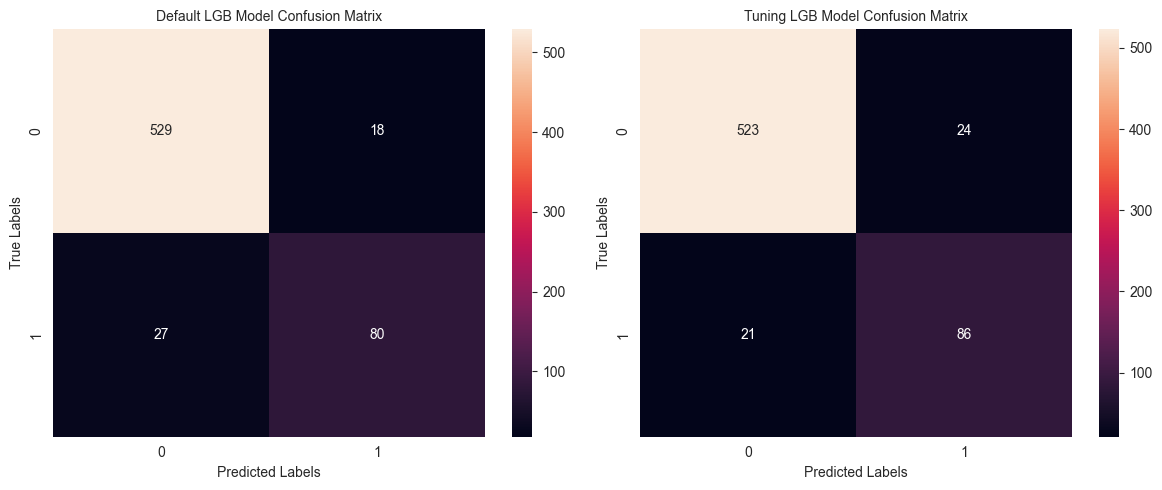

In [245]:
def plot_confusion_matrix(y_true, y_pred, model_title, ax):
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='.0f', ax=ax)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title(f'{model_title} Confusion Matrix', size=10)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

plot_confusion_matrix(y_test, y_pred_default, 'Default LGB Model', axes[0])

plot_confusion_matrix(y_test, y_pred_tuned, 'Tuning LGB Model', axes[1])

plt.tight_layout()
plt.show()


Grafik semakin membuktikan performa LightGBM tuned yang lebih baik dan tepat untuk digunakan pada kasus Churn Prediction ini. 
- LightGBM tuned terbukti mampu menurunkan jumlah case False Negative dan meningkatkan case True Negative. Artinya model ini dapat secara akurat mendeteksi dan klasifikasi pelanggan yang Churn berdasarkan fitur-fitur yang digunakan.
- Meski begitu, model LightGBM tuned ini masih memiliki kekurangan karena malah menurunkan performa untuk mendeteksi kasus False Positive. Artinya ada kemungkinan e-commerce akan mengeluarkan biaya yang tidak perlu (unnecessary cost) dari memberikan promo ke customer yang tidak Churn.

Setelah mengevaluasi model, berikut ringkasan hasil model LightGBM yang dibangun:
- F1 Score: 0.79
- Recall (Class 1/Churn):  0.80
- Precision (Class 1/Churn): 0.78 
- Accuracy: 0.93

Simpulan berdasarkan data tersebut adalah sebagai berikut:
- Score F1 pada data test & data train dapat dikatakan setara (79% & 76%) menandakan bahwa model ini tidak mengalami overfitting.
- Score F1 berada di rentang 79%, yang mana ini berada di rentang yang cukup optimal untuk sebuah model. Artinya model tidak mengalami underfitting
- Tuning model memperbaiki performa recall yang memiliki derajat kepentingan lebih tinggi untuk kasus ini.

### **Save Model**

In [246]:
best_model = grid.best_estimator_
save_model = best_model.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Number of positive: 427, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 2616, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


In [247]:
model = save_model

# Save the model to a file
with open('ChurnPrediction_Model_2.pkl', 'wb') as f:
    pickle.dump(model, f)

<hr>

# **I. FEATURE IMPORTANCE & SHAP ANALYSIS**


## **SHAP & Feature Importance**

Pada bagian ini, kita akan menjelaskan bagaimana model bekerja. 
- Feature importance berfungsi menjelaskan fitur-fitur manakah yang lebih berperan dalam memprediksi churn pelanggan e-commerece.
- SHAP (SHapley Additive exPlanations) berfungsi untuk menginterpretasikan prediksi model dan output dari machine learning yang dibangun. SHAP juga dapat memberikan insights pada level perilaku individu. 

Pertama-tama, kita penghitungan SHAP values berdasarkan model final yang telah kita buat menggunakan library `shap.TreeExplainer`. 
- Libary ini dapat menghitung SHAP values dari model LightGBM yang kita pakai. 
- Hasilnya adalah output penjelasan nilai kontribusi setiap fitur dalam memprediksi churn. 

In [248]:
cols = list(save_model[0].transformers_[0][1].get_feature_names_out()) + \
       list(save_model[0].transformers_[1][1].get_feature_names_out()) + \
       ['Complain']

# Preprocessing and feature selection
preprocess = save_model.named_steps['preprocess']
feature_selection = save_model.named_steps['feature_selection']

preprocessed_data = preprocess.transform(df)
selected_features = feature_selection.transform(preprocessed_data)

# Extract the model
model = save_model.named_steps['model']

# SHAP values calculation
explainer = shap.TreeExplainer(model, data=selected_features, feature_perturbation="interventional", model_output="probability")
shap_values = explainer.shap_values(selected_features)

 99%|===================| 3228/3270 [00:22<00:00]        

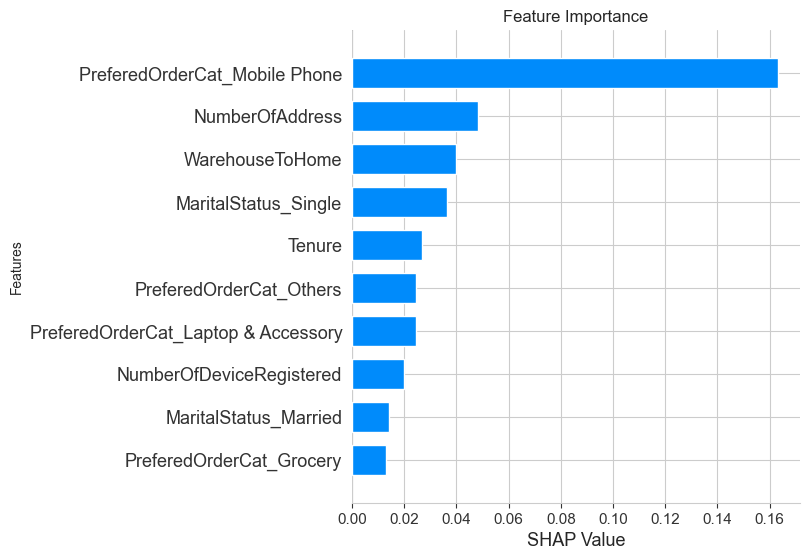

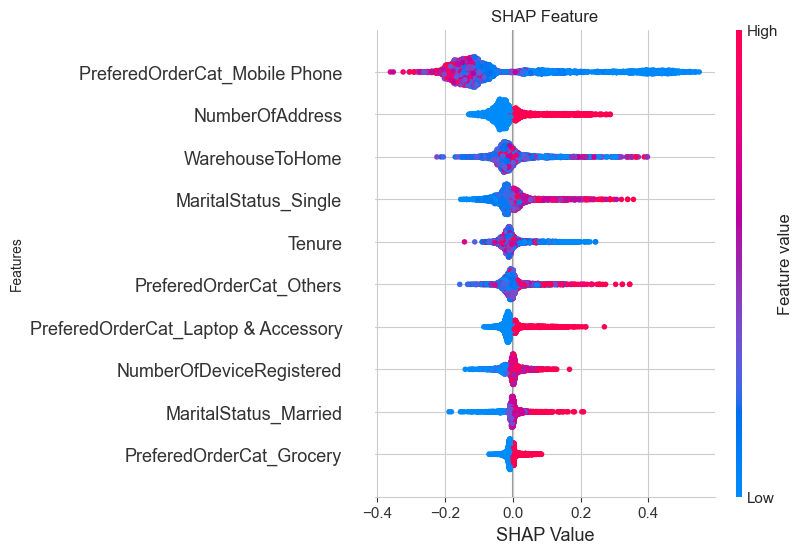

In [249]:
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, selected_features, feature_names=cols, plot_type='bar', show=False)
plt.xlabel('SHAP Value')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, selected_features, feature_names=cols, show=False)
plt.xlabel('SHAP Value')
plt.ylabel('Features')
plt.title('SHAP Feature')
plt.show()


Kesimpulan analisa Feature importance & SHAP:
- `PreferedOrderCat_Mobile_Phone` memiliki nilai SHAP paling tinggi, mengindikasikan bahwa fitur ini yang paling penting dalam memprediksi Churn. Hal ini masuk akal mempertimbangkan karakteristik barang yang bersifat seasonal/tidak rutin sehingga kecenderungannya adalah customer hanya akan berbelanja satu kali saja. Setelah mereka membeli barang tersebut, mereka tidak ada kebutuhan untuk kembali lagi untuk sementara waktu.
- `NumberOfAddress`, `WarehouseToHome` merupakan faktor penting selanjutnya. Ketiga faktor ini juga masuk akal dimana jarak dan alamat rumah akan sangat mempengaruhi kepada ongkos kirim barang, dimana semakin mahal ongkos kirim akan mendorong pelanggan untuk tidak berbelanja di e-commerce lagi.
- `MaritalStatus_Single` dan `tenure` juga memiliki pengaruh yang cukup baik pada prediksi churn. Dimana pelanggan baru (tenure rendah) cenderung belum memiliki loyalitas terhadap suatu produk/layanan sehingga cenderung lebih mudah churn. Sementara marital status single dapat diasumsikan memiliki kebutuhan yang lebih rendah (dibanding pasangan menikah) sehingga resiko untuk tidak berbelanja lebih tinggi.

## **Example of Churn Customer**

Sebagai pembuktian lebih lanjut, kita tunjukkan bagaimana model bekerja dalam memprediksi salah satu data yang ada dalam dataset. Untuk melakukan ini, kita akan menggunakan `shap.force_plot` yang akan menampilkan grafik probabilitas pelanggan untuk churn berdasarkan fitur yang ada dalam model.

Berikut adalah 5 daftar pelanggan yang terdeteksi memiliki potensi Churn paling tinggi berdasarkan model yang kita miliki. 

Secara umum, terlihat bahwa kelima pelanggan ini memiliki row data untuk fitur yang mencerminkan pelanggan churn, seperti `Tenure` yang rendah, `WarehouseToHome` yang tinggi, dan `PreferedOrderCat` untuk produk Mobile phone.

In [250]:
churn_prediction = save_model.predict_proba(df)
df['Churn Prediction'] = churn_prediction[:,1]
df.sort_values(by='Churn Prediction', ascending=False).head(5)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,Churn Prediction
2919,0.0,15.0,4,Mobile Phone,5,Single,7,1,0.0,124.04,1,0.999990
2410,0.0,15.0,4,Mobile Phone,5,Married,5,1,0.0,123.35,1,0.999970
1762,0.0,15.0,5,Mobile Phone,1,Single,2,1,0.0,123.40,1,0.999939
731,0.0,15.0,5,Mobile Phone,2,Single,2,1,0.0,123.40,1,0.999938
3474,1.0,31.0,6,Mobile Phone,1,Single,3,1,1.0,136.18,1,0.999925


In [251]:
Data_Churn =  df.sort_values('Churn Prediction', ascending=False)

Kemudian, berikut adalah function untuk menampilkan grafik `shap.force_plot`-nya.

In [252]:
def shap_plot(j, model, S, feature_names):
    if j >= len(S):
        print(f"Index {j} is out of bounds for the dataset with size {len(S)}.")
        return None
    
    shap.initjs()

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(S)

    y_pred = model.predict(S)[j]
    
    p = shap.force_plot(explainer.expected_value[1], shap_values[1][j], S.iloc[j], feature_names)
    print(f"The prediction for this customer is: {('Potential' if y_pred == 1 else 'Not Potential')} to Churn")
    return p

In [253]:
preprocessed_data = preprocess.transform(Data_Churn)
selected_features = feature_selection.transform(preprocessed_data)

columns = cols[:selected_features.shape[1]]

Grafik plot untuk pelanggan yang berpotensi Churn

In [254]:
# SHAP plot for customer Churn
shap_plot_result = shap_plot(0, model, pd.DataFrame(selected_features, columns=columns), columns)
shap_plot_result

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
The prediction for this customer is: Potential to Churn


Grafik plot untuk pelanggan yang tidak berpotensi Churn

In [255]:
# SHAP plot for customer Tidak Churn
shap_plot_result = shap_plot(3200, model, pd.DataFrame(selected_features, columns=columns), columns)
shap_plot_result

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
The prediction for this customer is: Not Potential to Churn


Kedua grafik menunjukkan perbedaan kontras antara pelanggan yang berpotensi Churn dan Tidak Churn. Hal ini terlihat dari perbedaan karakteristik fitur-fitur penting model dimana kedua contoh customer memiliki perbedaan nilai yang berbanding terbalik.

Dengan begitu, kita dapat simpulkan bahwa model LightGBM yang dibangun dapat dengan konsisten dan akurat klasifikasi pelanggan apakah mereka akan berpotensi Churn atau Tidak Churn berdasarkan data fitur yang tersedia.

<hr>

# **J. CONCLUSION & RECOMMENDATION**


## **Model's impact to business objectives**

Tujuan pembuatan model:
- Melakukan deteksi awal pelanggan yang akan Churn dan tidak Churn
- Melakukan usaha kepada pelanggan yang akan churn melalui pemberian promo/voucher. Disaat yang bersamaan tidak memberikan promo/voucher kepada pelanggan yang tidak akan churn.

Hasil pembuatan akhir model:

In [256]:
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       547
           1       0.78      0.80      0.79       107

    accuracy                           0.93       654
   macro avg       0.87      0.88      0.88       654
weighted avg       0.93      0.93      0.93       654



**Performa model dalam memprediksi pelanggan terhadap potensi Churn/Tidak Churn berdasarkan F1 Score:**
- Model yang dibuat mampu memprediksi sekitar 79% pelanggan dengan karakteristik berpotensi Churn. 
- Lalu, di saat yang bersamaan juga model mampu memprediksi sekitar 96% pelanggan yang tidak memiliki potensi menjadi Churn.


**Manfaat terhadap bisnis e-commerce**

Mari kita ilustrasikan bagaimana model berdampak kepada bisnis e-commerce menggunakan grafik confusion matrix hasil evaluasi model

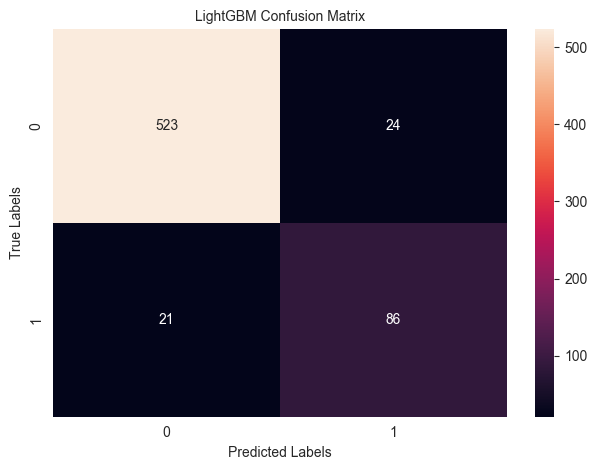

In [257]:
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='.0f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('LightGBM Confusion Matrix', size=10)
plt.tight_layout()
plt.show()

**Model mampu memprediksi klasifikasi customer yang akan Churn/Tidak churn dengan cukup akurat** 

Dari 654 pelanggan yang dijadikan data test pada evaluasi model, model LightGBM yang dibangun mampu mengklasifikasikan sebanyak; 
- 523 pelanggan yang tidak Churn (True Negative)
- 86 pelanggan Churn (True Negative)
- Meski masih ada sekitar 45 orang terklasifikasi secara kurang tepat (False Positive & False Negative) 

Artinya model mampu mendeteksi sebesar 93% pelanggan secara tepat apakah mereka termasuk pelanggan yang akan Churn & Tidak Churn.

**Model membantu e-commerce dalam penentuan pemberian promo dan penghematan biaya sekaligus**.

Mari kita ilustrasikan menggunakan Asumsi pemberian promo senilai 100 per pelanggan.

1. Pemberian promo tanpa adanya model machine learning mengharuskan e-commerce perlu memberikan promo ke seluruh pelanggan.
- Biaya yang dibutuhkan 654 x 100 = 65400 

2. Dengan adanya model machine learning ini, e-commerce dapat dengan lebih akurat memberikan promo terhadap orang yang berpotensi Churn saja. 
- Biaya yang dibutuhkan 
    - True Positive Churn customer: 86 x 100 = 8600
    - False Positive & False Negative customer: 45 X 100 = 4500

e-commerce hanya perlu mengeluarkan biaya senilai 13100 untuk promo dalam usahanya menjaga pelanggan agar tidak churn. Hal ini dikarenakan e-commerece dapat dengan akurat mengetahui bahwa terdapat 523 pelanggan yang tidak berpotensi Churn, sehingga tidak perlu diberikan promo lagi.

Manfaat monetary yang didapatkan e-commerce dengan adanya model machine learning:
- 65400 - 13100 = 52300 --> e-commerce dapat menghemat sebesar 52300 dari biaya yang perlu dikeluarkan untuk biaya promo.

**Dampak tambahan dengan adanya model machine learning:**

Lebih lanjut, adanya machine learning memungkinkan e-commerce melakukan promo yang lebih agresif kepada pelanggan yang berpotensi churn. Harapannya adalah efektivitas promo lebih tinggi dalam menjaga mereka tetap menggunakan layanan e-commerece. --> asumsi pemberian promo 250 per pelanggan.
- True Positive Churn customer: 86 x 250 = 20750
- False Positive & False Negative customer: 45 X 250 = 11250

Total biaya yang dibutukan adalah 32000. Bahkan dengan promo yang lebih tinggi, machine learning masih mampu menghemat pengeluaran e-commerce sebesar 32650.



## **Model's current limitation**

1. Model memprediksi pelanggan Churn terbatas pada fitur-fitur yang digunakan dalam proses pembuatan model, yaitu: `Tenure`, `WarehouseToHome`, `NumberOfDeviceRegistered`,`PreferedOrderCat`, `SatisfactionScore`,`MaritalStatus`,`NumberOfAddress`, `Complain`, `DaySinceLastOrder`, `CashbackAmount`
- Apabila ada fitur baru pada dataset, maka model belum bisa menghitung pengaruhnya kepada prediksi Churn pelanggan. Perlu penghitungan ulang kepada model.

In [258]:
df.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn', 'Churn Prediction'],
      dtype='object')

2. Model memprediksi pelanggan Churn terbatas pada rentang value dari tiap-tiap fitur:
- Tenure: 0-61 bulan
- Warehouse To Home: 5-127 km
- Number of Device Registered: 1-6 devices
- Number of Address: 1-22 address
- Day since last order: 0-46 hari
- Cashback Amount: 0-324.99
- Apabila ada value diluar dari rentang tersebut, maka model belum bisa menghitung pengaruhnya kepada prediksi Churn pelanggan. Perlu penghitungan ulang kepada model.

In [259]:
display(df.describe().T, df.describe(include='object').T)

,count,mean,std,min,25%,50%,75%,max
Tenure,3270.0,10.052854,8.500863,0.000000,3.000000,8.583333,15.000000,61.00000
WarehouseToHome,3270.0,15.489348,8.418450,5.000000,9.000000,13.166667,20.000000,127.00000
NumberOfDeviceRegistered,3270.0,3.676453,1.017390,1.000000,3.000000,4.000000,4.000000,6.00000
SatisfactionScore,3270.0,3.020795,1.395113,1.000000,2.000000,3.000000,4.000000,5.00000
NumberOfAddress,3270.0,4.222936,2.623195,1.000000,2.000000,3.000000,6.000000,22.00000
Complain,3270.0,0.281651,0.449873,0.000000,0.000000,0.000000,1.000000,1.00000
DaySinceLastOrder,3270.0,4.480785,3.618313,0.000000,2.000000,3.000000,7.000000,46.00000
CashbackAmount,3270.0,177.417670,49.310647,0.000000,145.892500,163.885000,197.137500,324.99000
Churn,3270.0,0.163303,0.369698,0.000000,0.000000,0.000000,0.000000,1.00000
Churn Prediction,3270.0,0.178776,0.354342,0.000003,0.000907,0.006265,0.057555,0.99999


,count,unique,top,freq
PreferedOrderCat,3270,5,Laptop & Accessory,1213
MaritalStatus,3270,3,Married,1686


3. Model menggunakan F1 Score sebagai metrik utama performa model. F1 Score menggabungkan score Recall & Precision secara setara. 
- Meski cocok untuk kasus data imbalance seperti kasus Churn Prediction, F1 Score memiliki kemungkinan kurang spesifik/tajam dalam mengevaluasi performa model yang memiliki kebutuhan lebih tinggi untuk mengurangi False Negative dibandingkan False Positive. Perlu eksplorasi lebih lanjut untuk mencari metrik pengukuran yang lebih tepat/cocok (ie F2 Score)

4. Data imbalance untuk kelompok Churn. 
- Saat ini data imbalance disiasati menggunakan data engineering. Namun tentu hal ini masih memiliki resiko error dan tidak sebaik apabila memiliki data asli yang lebih seimbang.

## **Future recommendation**

**Rekomendasi untuk e-commerce:**
1. Menggunakan model yang telah dibangun untuk mendeteksi pelanggan existing / baru terhadap kecenderungan mereka untuk Churn. Ini berguna agar e-commerce bisa menarget effortnya dengan tepat. Bagi pelanggan yang terdeteksi berpotensi Churn, maka e-commerce perlu memberikan usaha-usaha agar mereka tetap berbelanja ke platform ini. Salah satunya memberikan promo.
1. Selain bersikap reaktif (pemberian promo untuk pelanggan berpotensi Churn), e-commerce bisa melakukan serangkaian usaha lain agar pelanggan bisa loyal secara organik:
- Mempromosikan/perkenalan produk-produk lain yang ada di e-commerce => kecenderungan pelanggan churn adalah pembelian barang mobile phone yang karakteristiknya memang tidak rutin. e-commerce perlu mengenalkan produk-produk lain kepada pelanggan yang membeli barang mobile-phone agar mereka tahu bahwa mereka bisa berbelanja barang lain di platform ini. Penggunaan tools CRM menjadi salah satu opsi.
- Investasi jangka panjang untuk lokasi warehouse ==> jarak kirim dari warehouse juga menjadi faktor pelanggan churn. Lokasi warehouse yang lebih dekat diharapkan dapat mengatasi permasalahan ini. e-commerce perlu melakukan analisa tambahan dalam penentuan lokasi warehose berdasarkan lokasi pelanggan.
- Pembuatan skema loyalti ==> hal ini ditujukan untuk membuat engagement level terhadap pelanggan baru. Skema loyalti berupa pemberian promo berdasarkan keaktifan pelanggan sesuai level engagementnya bisa memotivasi pelanggan agar terus berbelanja ke platform secara organik.


**Rekomendasi perbaikan model:**

1. Eksplorasi metrik evaluasi performa lain -> salah satu opsinya adalah F2 Score (https://deepchecks.com/glossary/f-score/). Score ini berpotensi memberikan hasil evaluasi performa lebih tajam untuk kasus Churn dimana score Recall perlu bobot lebih tinggi dibandingkan Precision.
1. Menambahkan lebih banyak data khususnya untuk kelompok Churn. Hal ini agar kualitas data lebih baik dan meminimalisasi error dari penghitungan
1. Menambahkan fitur-fitur lain dari interaksi pelanggan dengan platform Churn, seperti `Last_Login`, `Total_purchase`, `Total_product_type_purchased`, `Payment_method`, dll. Fitur-fitur tersebut berpotensi untuk membuat prediksi Churn lebih akurat lagi.
1. Meningkatkan kualitas data, seperti kurangi missing value, error label, duplikat, dll



Sekian & terima kasih